# Importando librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from datetime import datetime

import scipy.stats as st
from scipy.stats import t as t_student
from scipy.stats import norm

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats import anova
from statsmodels.stats.anova import anova_lm

from statsmodels.graphics.factorplots import interaction_plot
from  statsmodels.stats.multicomp import pairwise_tukeyhsd

# Cargando data set

In [2]:
df=pd.read_csv('dataset_SCL.csv')
df

C:\Users\Roberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [4]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

# 1. 
# ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

### Respuesta

Los datos se distribuyen de diferente manera

### Analisis

In [5]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [6]:
df.nunique()

Fecha-I      53252
Vlo-I          750
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          866
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

In [7]:
correlacion=df.corr()

In [8]:
correlacion

,DIA,MES,AÑO
DIA,1.000000,0.014318,-0.009073
MES,0.014318,1.000000,-0.008642
AÑO,-0.009073,-0.008642,1.000000


<AxesSubplot:>

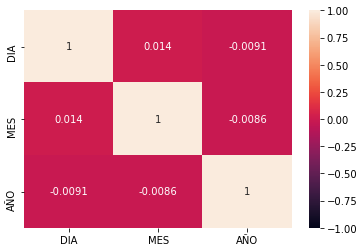

In [9]:
sns.heatmap(correlacion,vmin=-1,vmax=1,xticklabels=correlacion.columns,yticklabels=correlacion.columns,annot=True)

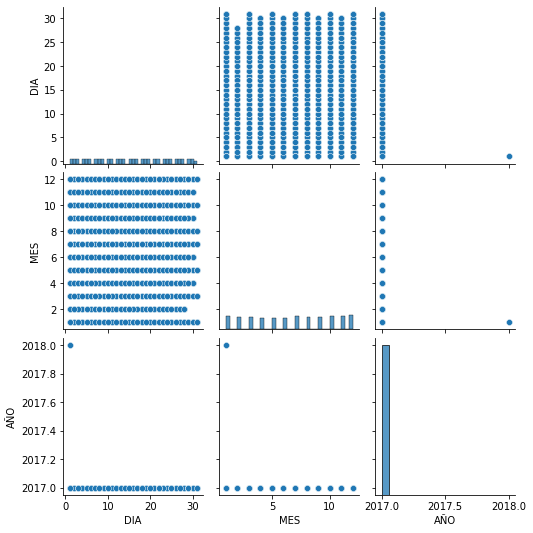

In [10]:
sns.pairplot(df)

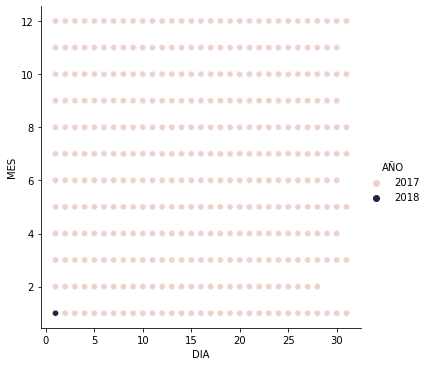

In [11]:
sns.relplot(x='DIA',y='MES',hue='AÑO',data=df)

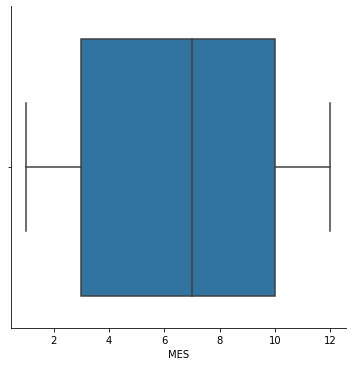

In [12]:
sns.catplot(x='MES',kind='box',data=df)

<AxesSubplot:xlabel='MES'>

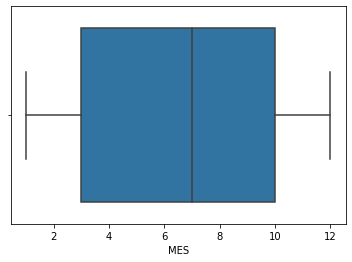

In [13]:
sns.boxplot(x='MES',data=df)

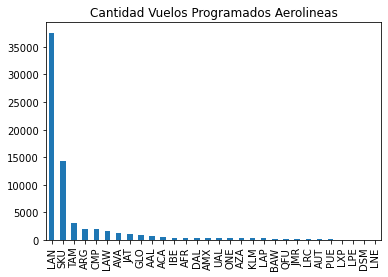

In [14]:
plot = df['Emp-I'].value_counts().plot(kind='bar',title='Cantidad Vuelos Programados Aerolineas')

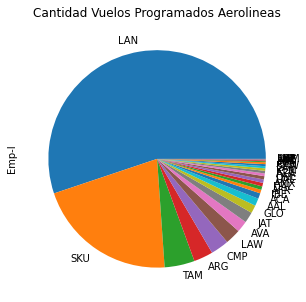

In [15]:
plt.figure(figsize=(7,5))
plot = df['Emp-I'].value_counts().plot.pie(title='Cantidad Vuelos Programados Aerolineas')

In [16]:
df['Emp-I'].describe()

count     68206
unique       30
top         LAN
freq      37611
Name: Emp-I, dtype: object

In [17]:
pd.value_counts(df['Emp-I'])

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp-I, dtype: int64

In [18]:
df['Emp-I'][df['Emp-I']=='LAN'].count()

37611

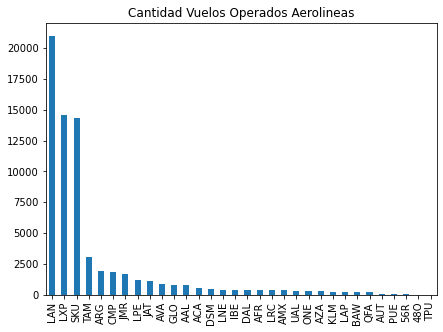

In [19]:
plt.figure(figsize=(7,5))
plot = df['Emp-O'].value_counts().plot(kind='bar',title='Cantidad Vuelos Operados Aerolineas')

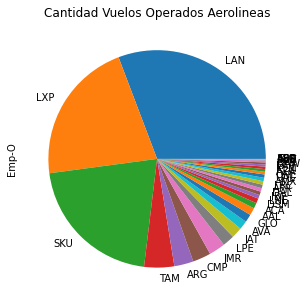

In [20]:
plt.figure(figsize=(7,5))
plot = df['Emp-O'].value_counts().plot.pie(title='Cantidad Vuelos Operados Aerolineas')

In [21]:
df['Emp-O'].describe()

count     68206
unique       32
top         LAN
freq      20988
Name: Emp-O, dtype: object

In [22]:
pd.value_counts(df['Emp-O'])

LAN    20988
LXP    14558
SKU    14298
TAM     3046
ARG     1946
CMP     1850
JMR     1647
LPE     1214
JAT     1095
AVA      885
GLO      806
AAL      757
ACA      565
DSM      493
LNE      374
IBE      362
DAL      358
AFR      358
LRC      357
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      219
BAW      205
QFA      195
AUT       77
PUE       49
56R       17
48O       10
TPU        2
Name: Emp-O, dtype: int64

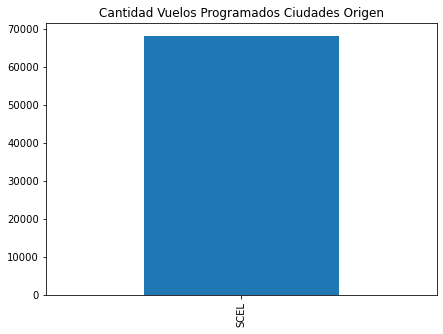

In [23]:
plt.figure(figsize=(7,5))
plot = df['Ori-I'].value_counts().plot(kind='bar',title='Cantidad Vuelos Programados Ciudades Origen')

In [24]:
df['Ori-I'].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-I, dtype: object

In [25]:
pd.value_counts(df['Ori-I'])

SCEL    68206
Name: Ori-I, dtype: int64

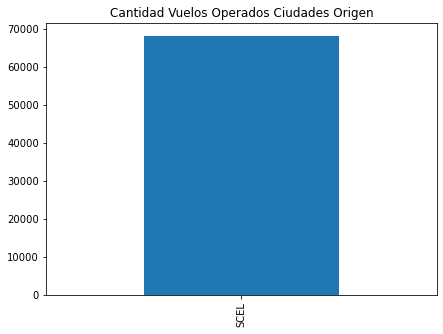

In [26]:
plt.figure(figsize=(7,5))
plot = df['Ori-O'].value_counts().plot(kind='bar',title='Cantidad Vuelos Operados Ciudades Origen')

In [27]:
df['Ori-O'].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-O, dtype: object

In [28]:
pd.value_counts(df['Ori-O'])

SCEL    68206
Name: Ori-O, dtype: int64

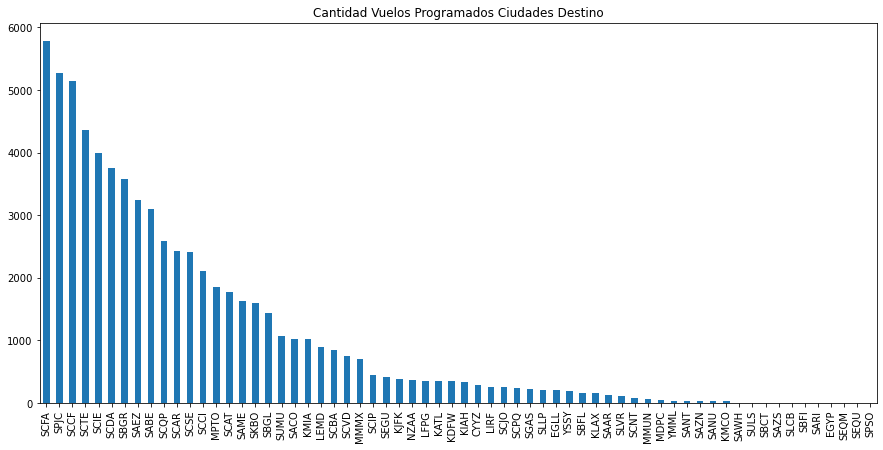

In [29]:
plt.figure(figsize=(15,7))
plot = df['Des-I'].value_counts().plot(kind='bar',title='Cantidad Vuelos Programados Ciudades Destino')

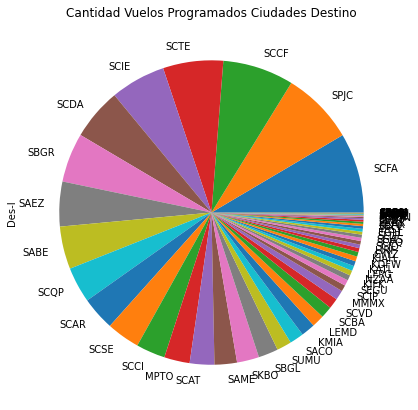

In [30]:
plt.figure(figsize=(15,7))
plot = df['Des-I'].value_counts().plot.pie(title='Cantidad Vuelos Programados Ciudades Destino')

In [31]:
df['Des-I'].describe()

count     68206
unique       64
top        SCFA
freq       5787
Name: Des-I, dtype: object

In [32]:
pd.value_counts(df['Des-I'])

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SARI       1
EGYP       1
SEQM       1
SEQU       1
SPSO       1
Name: Des-I, Length: 64, dtype: int64

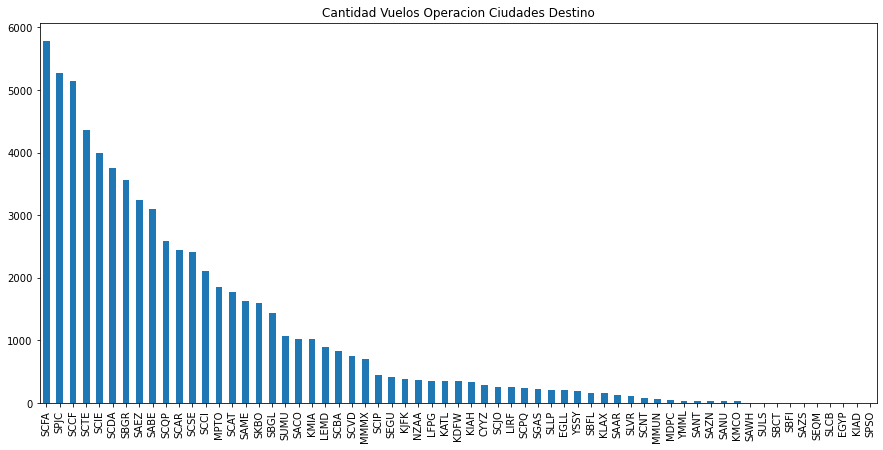

In [33]:
plt.figure(figsize=(15,7))
plot = df['Des-O'].value_counts().plot(kind='bar',title='Cantidad Vuelos Operacion Ciudades Destino')

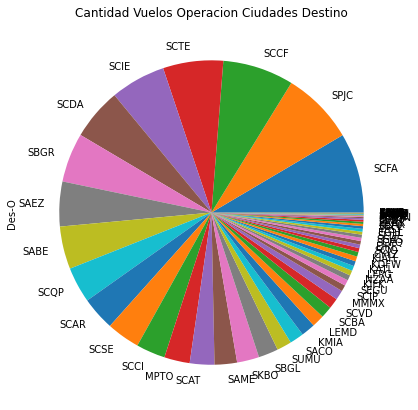

In [34]:
plt.figure(figsize=(15,7))
plot = df['Des-O'].value_counts().plot.pie(title='Cantidad Vuelos Operacion Ciudades Destino')

In [35]:
df['Des-O'].describe()

count     68206
unique       63
top        SCFA
freq       5786
Name: Des-O, dtype: object

In [36]:
pd.value_counts(df['Des-O'])

SCFA    5786
SPJC    5270
SCCF    5146
SCTE    4357
SCIE    3993
        ... 
SEQM       2
SLCB       1
EGYP       1
KIAD       1
SPSO       1
Name: Des-O, Length: 63, dtype: int64

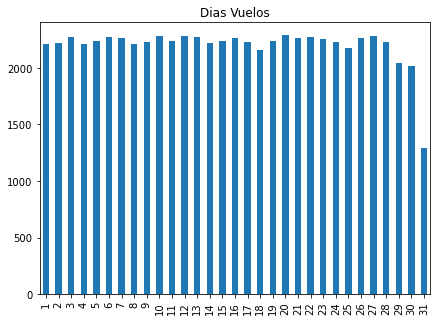

In [37]:
plt.figure(figsize=(7,5))
plot = df['DIA'].value_counts(sort=False).plot(kind='bar',title='Dias Vuelos')

In [38]:
df['DIA'].describe()

count    68206.000000
mean        15.714790
std          8.782886
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: DIA, dtype: float64

In [39]:
pd.value_counts(df['DIA'],sort=False)

1     2208
2     2223
3     2271
4     2215
5     2241
6     2275
7     2264
8     2213
9     2227
10    2283
11    2237
12    2284
13    2272
14    2221
15    2239
16    2268
17    2228
18    2160
19    2238
20    2290
21    2267
22    2272
23    2260
24    2232
25    2179
26    2267
27    2286
28    2232
29    2044
30    2020
31    1290
Name: DIA, dtype: int64

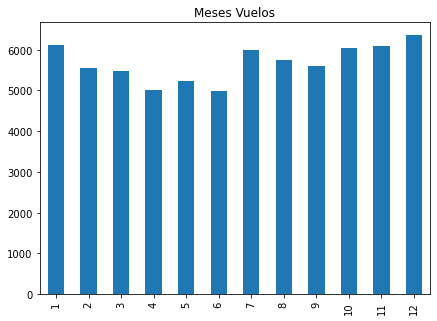

In [40]:
plt.figure(figsize=(7,5))
plot = df['MES'].value_counts(sort=False).plot(kind='bar',title='Meses Vuelos')

In [41]:
df['MES'].describe()

count    68206.000000
mean         6.622585
std          3.523321
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MES, dtype: float64

In [42]:
pd.value_counts(df['MES'],sort=True)

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

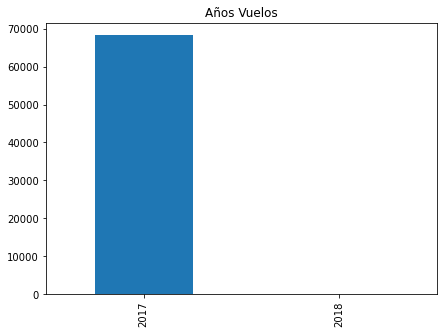

In [43]:
plt.figure(figsize=(7,5))
plot = df['AÑO'].value_counts().plot(kind='bar',title='Años Vuelos')

In [44]:
df['AÑO'].describe()

count    68206.000000
mean      2017.000029
std          0.005415
min       2017.000000
25%       2017.000000
50%       2017.000000
75%       2017.000000
max       2018.000000
Name: AÑO, dtype: float64

In [45]:
pd.value_counts(df['AÑO'])

2017    68204
2018        2
Name: AÑO, dtype: int64

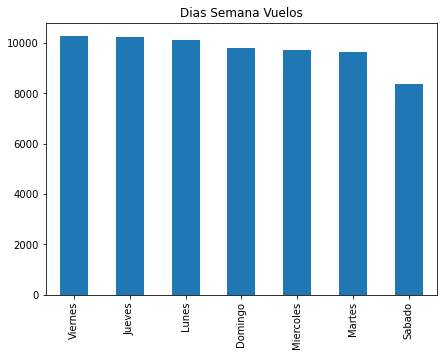

In [46]:
plt.figure(figsize=(7,5))
plot = df['DIANOM'].value_counts().plot(kind='bar',title='Dias Semana Vuelos')

In [47]:
df['DIANOM'].describe()

count       68206
unique          7
top       Viernes
freq        10292
Name: DIANOM, dtype: object

In [48]:
pd.value_counts(df['DIANOM'])

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

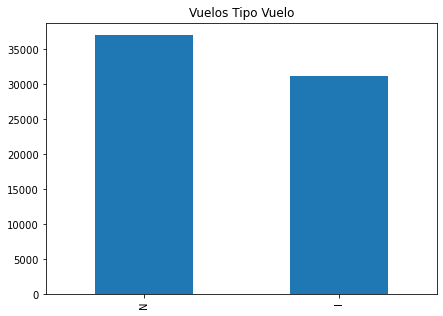

In [49]:
plt.figure(figsize=(7,5))
plot = df['TIPOVUELO'].value_counts().plot(kind='bar',title='Vuelos Tipo Vuelo')

In [50]:
df['TIPOVUELO'].describe()

count     68206
unique        2
top           N
freq      36966
Name: TIPOVUELO, dtype: object

In [51]:
pd.value_counts(df['TIPOVUELO'])

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

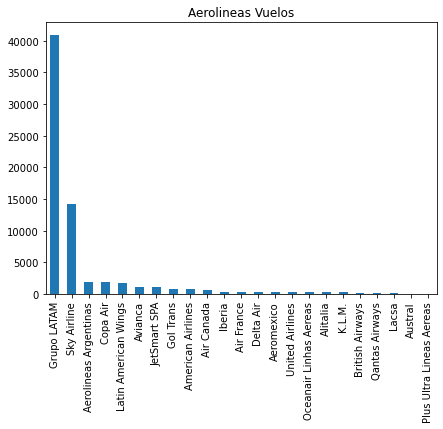

In [52]:
plt.figure(figsize=(7,5))
plot = df['OPERA'].value_counts().plot(kind='bar',title='Aerolineas Vuelos')

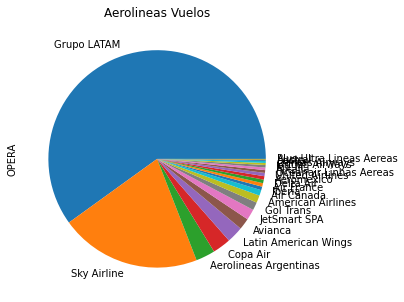

In [53]:
plt.figure(figsize=(7,5))
plot = df['OPERA'].value_counts().plot.pie(title='Aerolineas Vuelos')

In [54]:
df['OPERA'].describe()

count           68206
unique             23
top       Grupo LATAM
freq            40892
Name: OPERA, dtype: object

In [55]:
pd.value_counts(df['OPERA'])

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Air France                    358
Delta Air                     358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

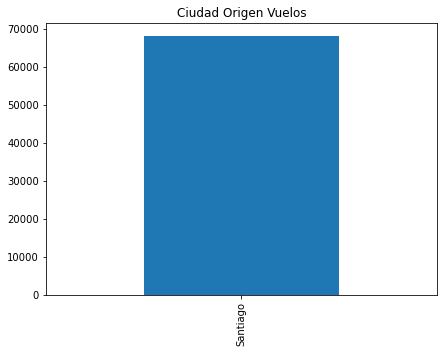

In [56]:
plt.figure(figsize=(7,5))
plot = df['SIGLAORI'].value_counts().plot(kind='bar',title='Ciudad Origen Vuelos')

In [57]:
df['SIGLAORI'].describe()

count        68206
unique           1
top       Santiago
freq         68206
Name: SIGLAORI, dtype: object

In [58]:
pd.value_counts(df['SIGLAORI'])

Santiago    68206
Name: SIGLAORI, dtype: int64

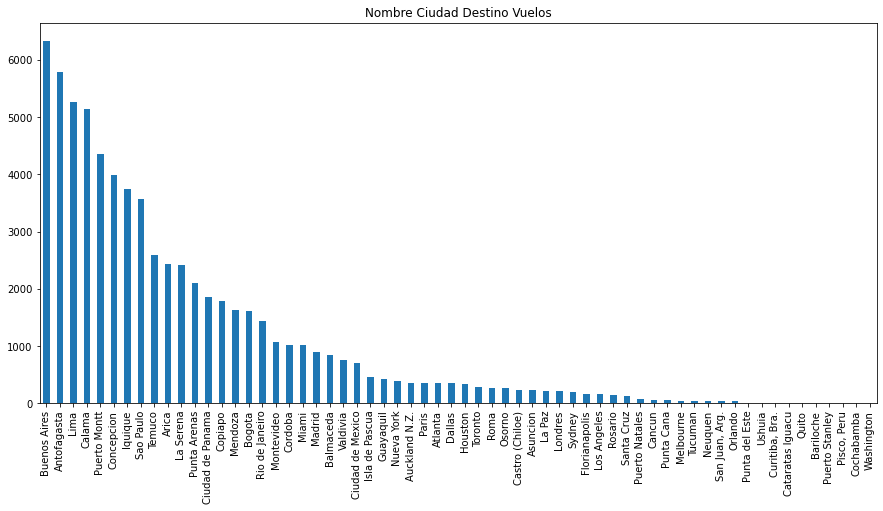

In [59]:
plt.figure(figsize=(15,7))
plot = df['SIGLADES'].value_counts().plot(kind='bar',title='Nombre Ciudad Destino Vuelos')

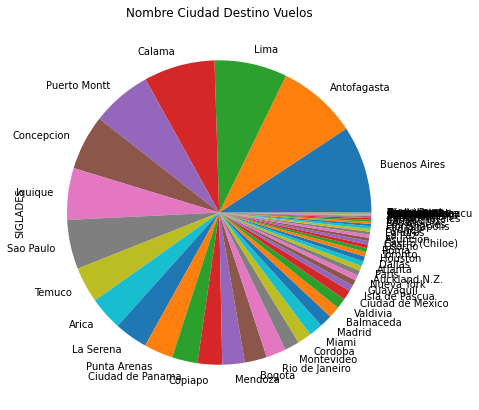

In [60]:
plt.figure(figsize=(15,7))
plot = df['SIGLADES'].value_counts().plot.pie(title='Nombre Ciudad Destino Vuelos')

In [61]:
df['SIGLADES'].describe()

count            68206
unique              62
top       Buenos Aires
freq              6335
Name: SIGLADES, dtype: object

In [62]:
pd.value_counts(df['SIGLADES'])

Buenos Aires      6335
Antofagasta       5786
Lima              5270
Calama            5146
Puerto Montt      4357
                  ... 
Bariloche            2
Puerto Stanley       1
Pisco, Peru          1
Cochabamba           1
Washington           1
Name: SIGLADES, Length: 62, dtype: int64

# 2. 
# Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv

In [63]:
df['Fecha-I']=pd.to_datetime(df['Fecha-I'])
df['Fecha-O']=pd.to_datetime(df['Fecha-O'])
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [64]:
df[(df['Fecha-I']>='2017-12-15') | (df['Fecha-I']<='2017-03-03')]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [65]:
df[(df['Fecha-I']>='2017-07-15') & (df['Fecha-I']<='2017-07-31')]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
32405,2017-07-15 20:00:00,912,SCEL,KMIA,AAL,2017-07-15 21:59:00,912,SCEL,KMIA,AAL,15,7,2017,Sabado,I,American Airlines,Santiago,Miami
32406,2017-07-17 20:00:00,912,SCEL,KMIA,AAL,2017-07-17 20:00:00,912,SCEL,KMIA,AAL,17,7,2017,Lunes,I,American Airlines,Santiago,Miami
32407,2017-07-18 20:00:00,912,SCEL,KMIA,AAL,2017-07-18 20:03:00,912,SCEL,KMIA,AAL,18,7,2017,Martes,I,American Airlines,Santiago,Miami
32408,2017-07-19 20:00:00,912,SCEL,KMIA,AAL,2017-07-19 19:51:00,912,SCEL,KMIA,AAL,19,7,2017,Miercoles,I,American Airlines,Santiago,Miami
32409,2017-07-20 20:00:00,912,SCEL,KMIA,AAL,2017-07-20 19:56:00,912,SCEL,KMIA,AAL,20,7,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38376,2017-07-26 18:47:00,8,SCEL,SCCF,JAT,2017-07-26 19:03:00,8,SCEL,SCCF,JAT,26,7,2017,Miercoles,N,JetSmart SPA,Santiago,Calama
38377,2017-07-27 18:47:00,8,SCEL,SCCF,JAT,2017-07-27 18:57:00,8,SCEL,SCCF,JAT,27,7,2017,Jueves,N,JetSmart SPA,Santiago,Calama
38378,2017-07-28 18:47:00,8,SCEL,SCCF,JAT,2017-07-28 18:50:00,8,SCEL,SCCF,JAT,28,7,2017,Viernes,N,JetSmart SPA,Santiago,Calama
38379,2017-07-30 18:47:00,8,SCEL,SCCF,JAT,2017-07-30 18:55:00,8,SCEL,SCCF,JAT,30,7,2017,Domingo,N,JetSmart SPA,Santiago,Calama


In [66]:
df[(df['Fecha-I']>='2017-09-11') & (df['Fecha-I']<='2017-09-30')]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
44132,2017-09-16 21:00:00,912,SCEL,KMIA,AAL,2017-09-16 21:02:00,912,SCEL,KMIA,AAL,16,9,2017,Sabado,I,American Airlines,Santiago,Miami
44133,2017-09-17 21:00:00,912,SCEL,KMIA,AAL,2017-09-17 21:02:00,912,SCEL,KMIA,AAL,17,9,2017,Domingo,I,American Airlines,Santiago,Miami
44134,2017-09-18 21:00:00,912,SCEL,KMIA,AAL,2017-09-18 20:55:00,912,SCEL,KMIA,AAL,18,9,2017,Lunes,I,American Airlines,Santiago,Miami
44135,2017-09-19 21:00:00,912,SCEL,KMIA,AAL,2017-09-19 21:01:00,912,SCEL,KMIA,AAL,19,9,2017,Martes,I,American Airlines,Santiago,Miami
44136,2017-09-20 21:00:00,912,SCEL,KMIA,AAL,2017-09-20 20:58:00,912,SCEL,KMIA,AAL,20,9,2017,Miercoles,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49731,2017-09-29 17:37:00,253,SCEL,SCTE,JAT,2017-09-29 18:02:00,253,SCEL,SCTE,JAT,29,9,2017,Viernes,N,JetSmart SPA,Santiago,Puerto Montt
49732,2017-09-25 13:21:00,281,SCEL,SCQP,JAT,2017-09-25 13:18:00,281,SCEL,SCQP,JAT,25,9,2017,Lunes,N,JetSmart SPA,Santiago,Temuco
49733,2017-09-26 13:21:00,281,SCEL,SCQP,JAT,2017-09-26 13:12:00,281,SCEL,SCQP,JAT,26,9,2017,Martes,N,JetSmart SPA,Santiago,Temuco
49734,2017-09-27 13:00:00,281,SCEL,SCQP,JAT,2017-09-27 13:02:00,281,SCEL,SCQP,JAT,27,9,2017,Miercoles,N,JetSmart SPA,Santiago,Temuco


In [67]:
df[(df['Fecha-I']>='2017-12-15') | (df['Fecha-I']<='2017-03-03') | ((df['Fecha-I']>='2017-07-15') & (df['Fecha-I']<='2017-07-31')) | ((df['Fecha-I']>='2017-09-11') & (df['Fecha-I']<='2017-09-30'))]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [68]:
df[(df['Fecha-I'].dt.hour>=5)&(df['Fecha-I'].dt.hour<12)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
201,2017-01-01 10:35:00,1281,SCEL,SABE,ARG,2017-01-01 10:25:00,1281,SCEL,SABE,ARG,1,1,2017,Domingo,I,Aerolineas Argentinas,Santiago,Buenos Aires
202,2017-01-02 10:35:00,1281,SCEL,SABE,ARG,2017-01-02 10:37:00,1281,SCEL,SABE,ARG,2,1,2017,Lunes,I,Aerolineas Argentinas,Santiago,Buenos Aires
203,2017-01-03 10:35:00,1281,SCEL,SABE,ARG,2017-01-03 10:33:00,1281,SCEL,SABE,ARG,3,1,2017,Martes,I,Aerolineas Argentinas,Santiago,Buenos Aires
204,2017-01-04 10:35:00,1281,SCEL,SABE,ARG,2017-01-04 11:06:00,1281,SCEL,SABE,ARG,4,1,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires
205,2017-01-05 10:35:00,1281,SCEL,SABE,ARG,2017-01-05 10:53:00,1281,SCEL,SABE,ARG,5,1,2017,Jueves,I,Aerolineas Argentinas,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68168,2017-12-15 08:55:00,281,SCEL,SCQP,JAT,2017-12-15 08:56:00,281.0,SCEL,SCQP,JAT,15,12,2017,Viernes,N,JetSmart SPA,Santiago,Temuco
68171,2017-12-20 11:57:00,281,SCEL,SCQP,JAT,2017-12-20 12:02:00,281.0,SCEL,SCQP,JAT,20,12,2017,Miercoles,N,JetSmart SPA,Santiago,Temuco
68173,2017-12-22 08:55:00,281,SCEL,SCQP,JAT,2017-12-22 09:01:00,281.0,SCEL,SCQP,JAT,22,12,2017,Viernes,N,JetSmart SPA,Santiago,Temuco
68177,2017-12-27 11:57:00,281,SCEL,SCQP,JAT,2017-12-27 11:58:00,281.0,SCEL,SCQP,JAT,27,12,2017,Miercoles,N,JetSmart SPA,Santiago,Temuco


In [69]:
df[(df['Fecha-I'].dt.hour>=12)&(df['Fecha-I'].dt.hour<19)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
79,2017-01-01 13:35:00,92,SCEL,SAEZ,ACA,2017-01-01 13:54:00,92,SCEL,SAEZ,ACA,1,1,2017,Domingo,I,Air Canada,Santiago,Buenos Aires
80,2017-01-02 13:35:00,92,SCEL,SAEZ,ACA,2017-01-02 14:35:00,92,SCEL,SAEZ,ACA,2,1,2017,Lunes,I,Air Canada,Santiago,Buenos Aires
81,2017-01-03 13:35:00,92,SCEL,SAEZ,ACA,2017-01-03 13:52:00,92,SCEL,SAEZ,ACA,3,1,2017,Martes,I,Air Canada,Santiago,Buenos Aires
82,2017-01-04 13:35:00,92,SCEL,SAEZ,ACA,2017-01-04 14:01:00,92,SCEL,SAEZ,ACA,4,1,2017,Miercoles,I,Air Canada,Santiago,Buenos Aires
83,2017-01-05 13:35:00,92,SCEL,SAEZ,ACA,2017-01-05 13:49:00,92,SCEL,SAEZ,ACA,5,1,2017,Jueves,I,Air Canada,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [70]:
df[(df['Fecha-I'].dt.hour>=19)|(df['Fecha-I'].dt.hour<5)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68192,2017-12-29 04:05:00,301,SCEL,SCCI,JAT,2017-12-29 04:00:00,301.0,SCEL,SCCI,JAT,29,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas
68194,2017-12-18 20:11:00,305,SCEL,SCCI,JAT,2017-12-18 20:21:00,305.0,SCEL,SCCI,JAT,18,12,2017,Lunes,N,JetSmart SPA,Santiago,Punta Arenas
68195,2017-12-23 04:05:00,305,SCEL,SCCI,JAT,2017-12-23 04:01:00,305.0,SCEL,SCCI,JAT,23,12,2017,Sabado,N,JetSmart SPA,Santiago,Punta Arenas
68196,2017-12-25 20:11:00,305,SCEL,SCCI,JAT,2017-12-25 20:13:00,305.0,SCEL,SCCI,JAT,25,12,2017,Lunes,N,JetSmart SPA,Santiago,Punta Arenas


In [71]:
condicionfecha=(df['Fecha-I']>='2017-12-15') | (df['Fecha-I']<='2017-03-03') | ((df['Fecha-I']>='2017-07-15') & (df['Fecha-I']<='2017-07-31')) | ((df['Fecha-I']>='2017-09-11') & (df['Fecha-I']<='2017-09-30'))
df['temporada_alta']=np.where(condicionfecha,1,0)
df['dif_min']=np.where(df['Fecha-O']>df['Fecha-I'],pd.to_timedelta(df['Fecha-O']-df['Fecha-I']).dt.seconds/60,0)
df['atraso_15']=np.where(df['dif_min']>15,1,0)
condicionmañana=(df['Fecha-I'].dt.hour>=5)&(df['Fecha-I'].dt.hour<12)
condiciontarde=(df['Fecha-I'].dt.hour>=12)&(df['Fecha-I'].dt.hour<19)
condicionnoche=(df['Fecha-I'].dt.hour>=19)|(df['Fecha-I'].dt.hour<5)
df['periodo_dia']=np.where(condicionmañana,'mañana',np.where(condiciontarde,'tarde','noche'))
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,0.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde


In [72]:
df['Fecha-I'][df['periodo_dia']=='mañana']

201     2017-01-01 10:35:00
202     2017-01-02 10:35:00
203     2017-01-03 10:35:00
204     2017-01-04 10:35:00
205     2017-01-05 10:35:00
                ...        
68168   2017-12-15 08:55:00
68171   2017-12-20 11:57:00
68173   2017-12-22 08:55:00
68177   2017-12-27 11:57:00
68179   2017-12-29 08:55:00
Name: Fecha-I, Length: 25352, dtype: datetime64[ns]

### Exportacion columnas a archivo synthetic_features.csv

In [73]:
df_exp=pd.DataFrame(df.loc[:,['temporada_alta','dif_min','atraso_15','periodo_dia']])
df_exp

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3.0,0,noche
1,1,9.0,0,noche
2,1,9.0,0,noche
3,1,3.0,0,noche
4,1,0.0,0,noche
...,...,...,...,...
68201,1,46.0,1,tarde
68202,1,16.0,1,tarde
68203,1,40.0,1,tarde
68204,1,13.0,0,tarde


### Se asume que el archivo csv se creara en la misma carpeta (repositorio) en el que se encuentra este jupyternotebook. Por lo mismo el path no lleva toda la ruta expecifica del archivo.

In [74]:
df_exp.to_csv('synthetic_features.csv',index=False)

# 3. 
# ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? 
# ¿Qué variables esperarías que más influyeran en predecir atrasos?

### Distribucion tasa atraso

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

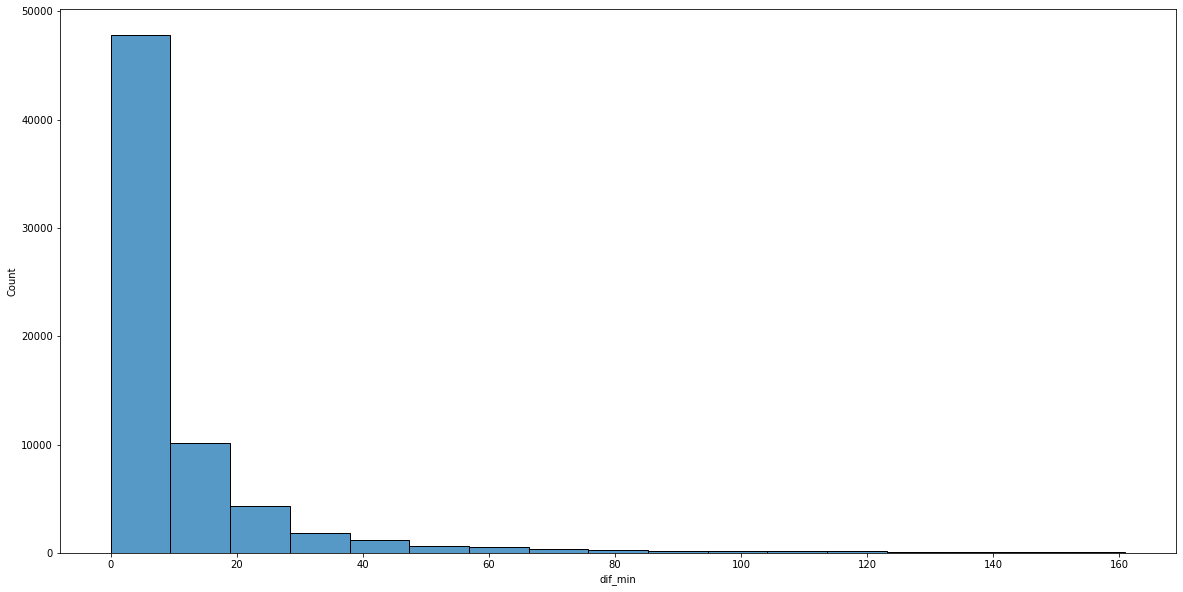

In [75]:
plt.figure(figsize=(20,10))
sns.histplot(df['dif_min'],bins=int(1+3.322*m.log10(len(df['dif_min']))))

In [76]:
print('Tasa atraso general:')
df['dif_min'].mean()

Tasa atraso general:


10.11576694132481

Es posible apreciar que la tasa de atraso se distribuye poisson con media 10.11

### Analisis tasa atraso por  variable

In [77]:
df.corr()

,DIA,MES,AÑO,temporada_alta,dif_min,atraso_15
DIA,1.000000,0.014318,-0.009073,0.183613,-0.005400,-0.002517
MES,0.014318,1.000000,-0.008642,-0.293902,0.075682,0.083416
AÑO,-0.009073,-0.008642,1.000000,0.007793,0.002726,0.004394
temporada_alta,0.183613,-0.293902,0.007793,1.000000,0.019182,0.020332
dif_min,-0.005400,0.075682,0.002726,0.019182,1.000000,0.724576
atraso_15,-0.002517,0.083416,0.004394,0.020332,0.724576,1.000000


In [78]:
bydestino=df.groupby('Des-O').mean()
bydestino['dif_min'].describe()

count     63.000000
mean      13.587346
std       15.483313
min        0.000000
25%        7.939158
50%       10.576063
75%       14.168634
max      113.000000
Name: dif_min, dtype: float64

[]

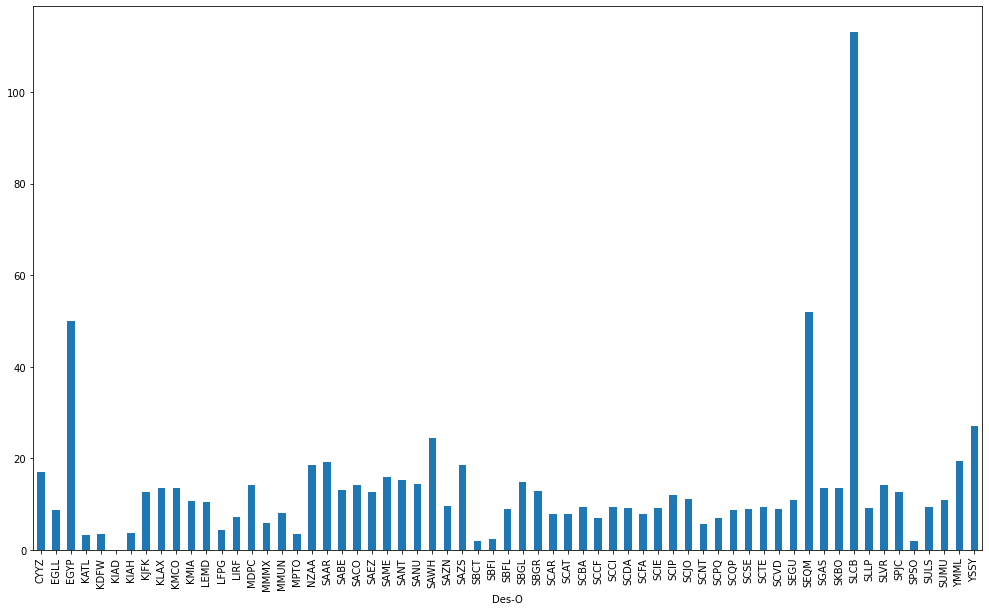

In [79]:
plt.figure(figsize=(17,10))
bydestino['dif_min'].plot(kind='bar')
plt.plot()

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

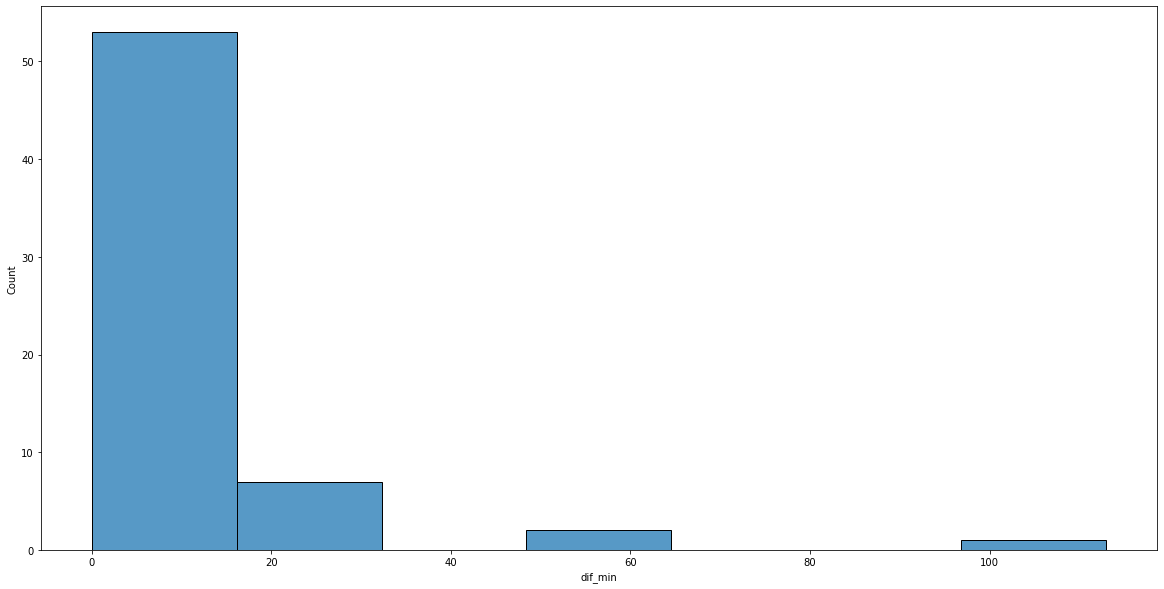

In [80]:
plt.figure(figsize=(20,10))
sns.histplot(bydestino['dif_min'],bins=round(1+3.322*m.log10(len(bydestino['dif_min']))))

In [81]:
pd.crosstab(index=df['Des-O'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
Des-O,,,
CYYZ,194,89,283
EGLL,176,29,205
EGYP,0,1,1
KATL,337,21,358
KDFW,332,25,357
...,...,...,...
SULS,5,1,6
SUMU,846,220,1066
YMML,18,21,39


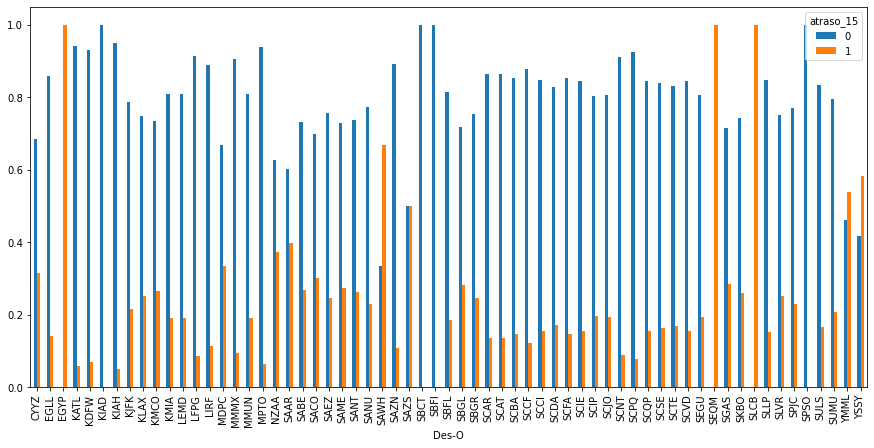

In [82]:
plot = pd.crosstab(index=df['Des-O'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))
#.apply(lambda r: r/r.sum() *100,axis=1)

In [83]:
byaerolinea=df.groupby('OPERA').mean()
byaerolinea['dif_min'].describe()

count    23.000000
mean     10.924337
std       8.399142
min       2.079772
25%       4.842669
50%       8.800000
75%      12.680598
max      32.306122
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='OPERA'>

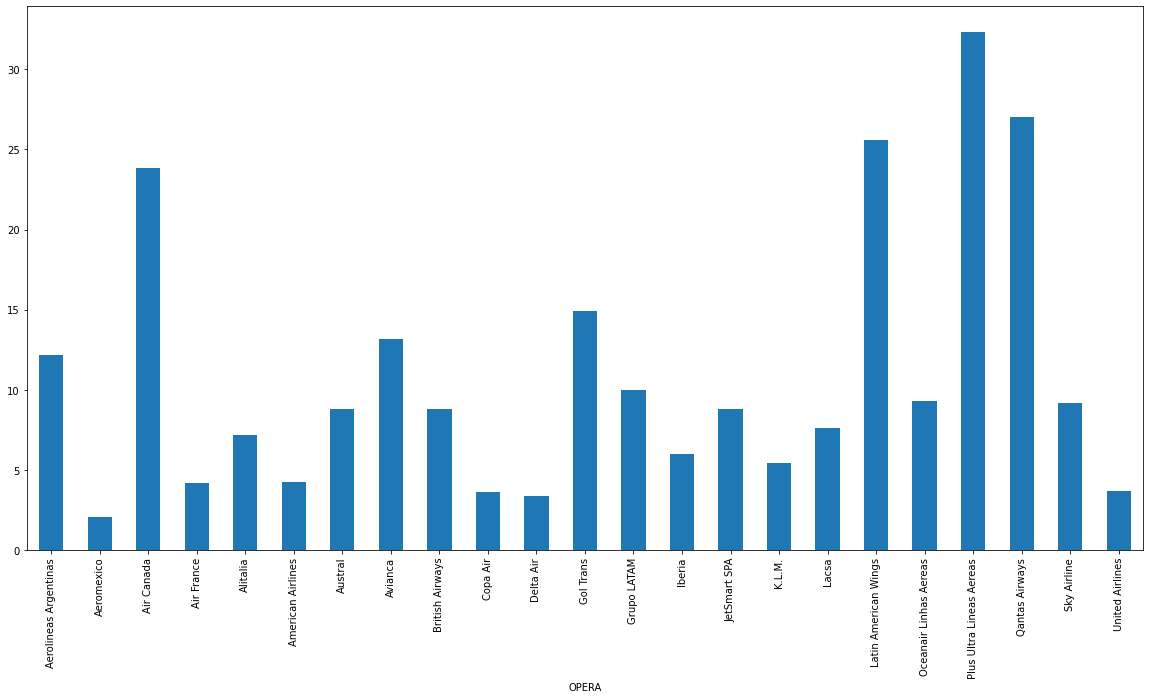

In [84]:
plt.figure(figsize=(20,10))
byaerolinea['dif_min'].plot(kind='bar')

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

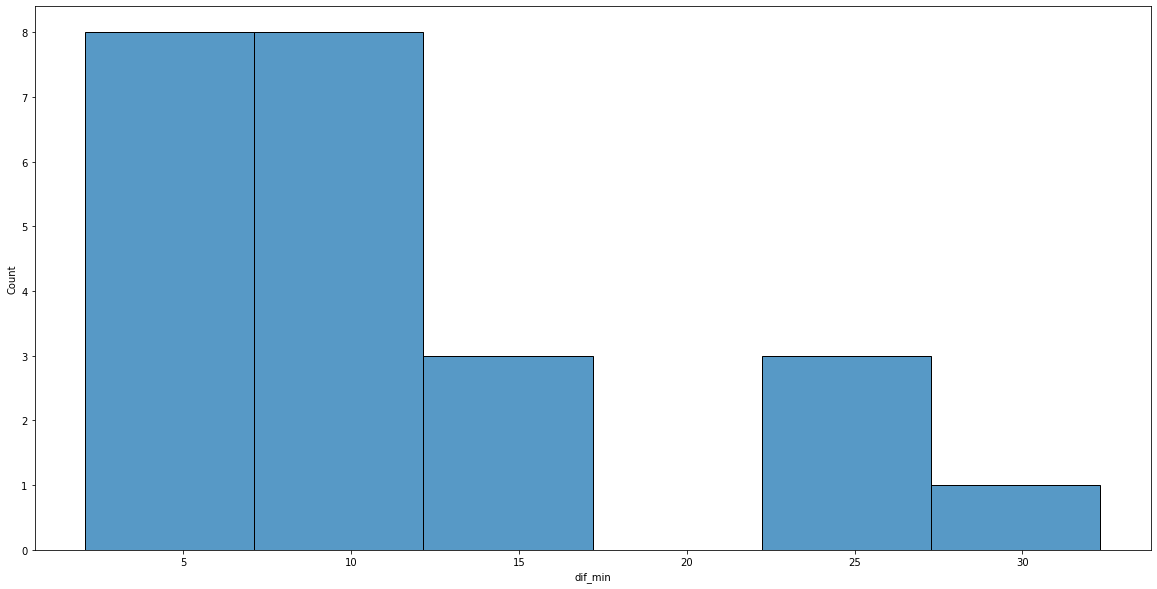

In [85]:
plt.figure(figsize=(20,10))
sns.histplot(byaerolinea['dif_min'],bins=round(1+3.322*m.log10(len(byaerolinea['dif_min']))))

In [86]:
pd.crosstab(index=df['OPERA'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
OPERA,,,
Aerolineas Argentinas,1481,468,1949
Aeromexico,341,10,351
Air Canada,307,258,565
Air France,328,30,358
Alitalia,230,29,259
American Airlines,706,51,757
Austral,59,15,74
Avianca,846,306,1152
British Airways,176,29,205


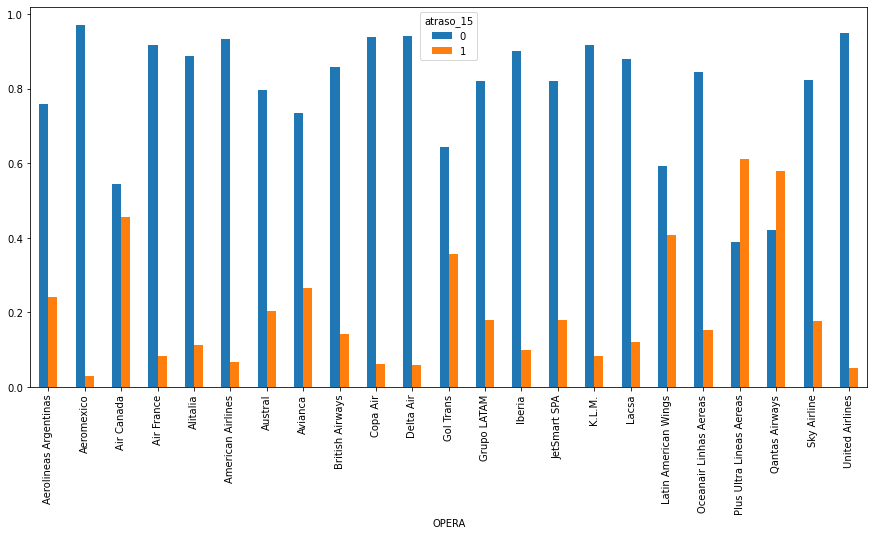

In [87]:
plot = pd.crosstab(index=df['OPERA'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

In [88]:
bymes=df.groupby('MES').mean()
bymes['dif_min'].describe()

count    12.000000
mean     10.002990
std       2.567078
min       6.919920
25%       8.610508
50%       9.614579
75%      10.773483
max      16.045895
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='MES'>

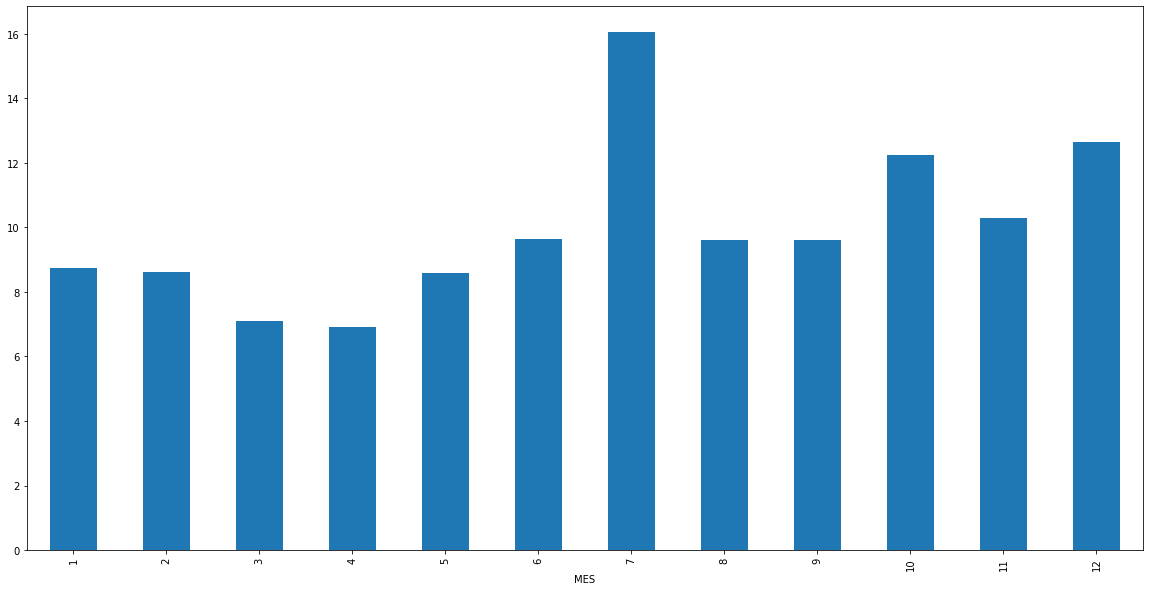

In [89]:
plt.figure(figsize=(20,10))
bymes['dif_min'].plot(kind='bar')

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

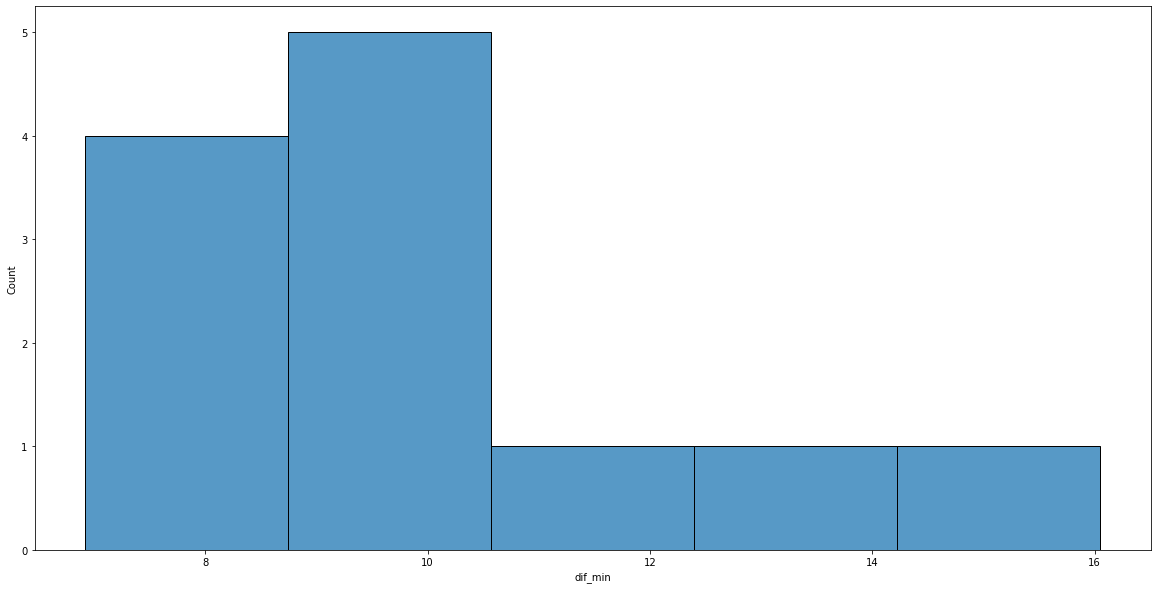

In [90]:
plt.figure(figsize=(20,10))
sns.histplot(bymes['dif_min'],bins=round(1+3.322*m.log10(len(bymes['dif_min']))))

In [91]:
pd.crosstab(index=df['MES'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
MES,,,
1,5130,978,6108
2,4718,843,5561
3,4851,631,5482
4,4435,585,5020
5,4413,827,5240
6,4129,852,4981
7,4234,1758,5992
8,4748,996,5744
9,4643,967,5610


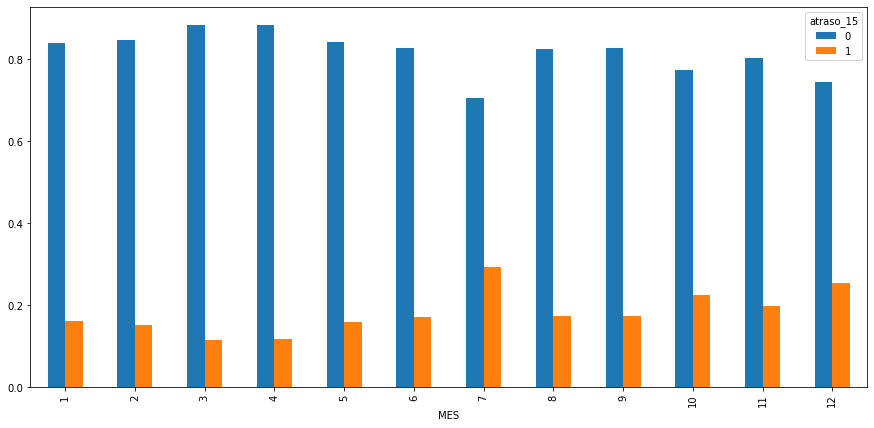

In [92]:
plot = pd.crosstab(index=df['MES'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

In [93]:
bydia=df.groupby('DIANOM').mean()
bydia['dif_min'].describe()

count     7.000000
mean     10.082629
std       0.980736
min       9.017762
25%       9.441898
50%       9.553281
75%      10.716269
max      11.691022
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='DIANOM'>

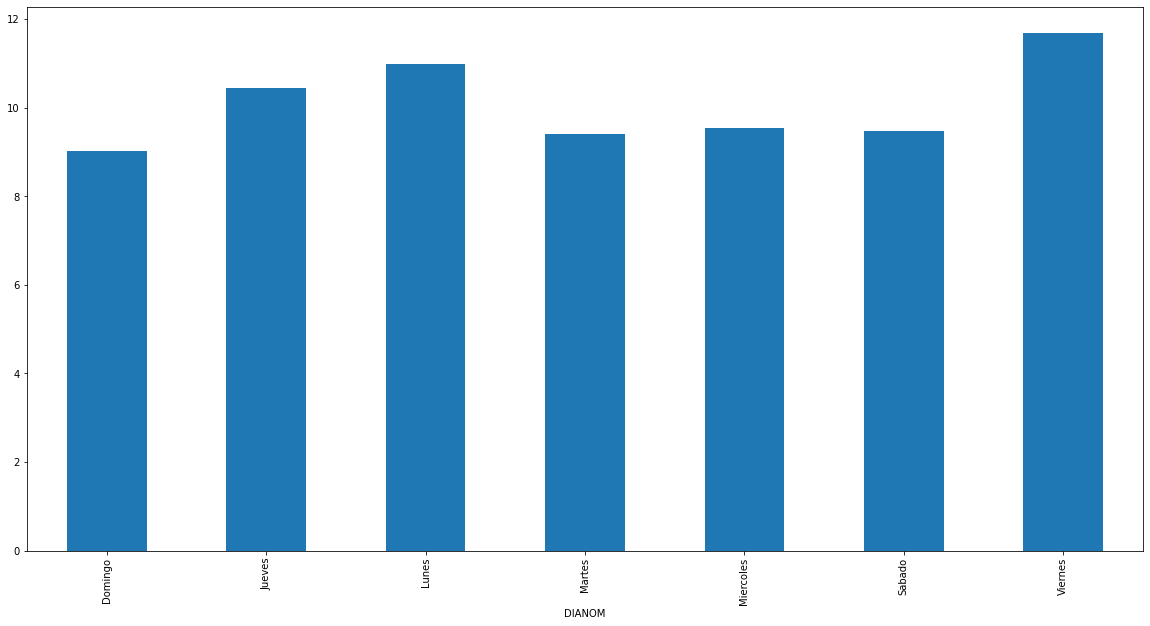

In [94]:
plt.figure(figsize=(20,10))
bydia['dif_min'].plot(kind='bar')

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

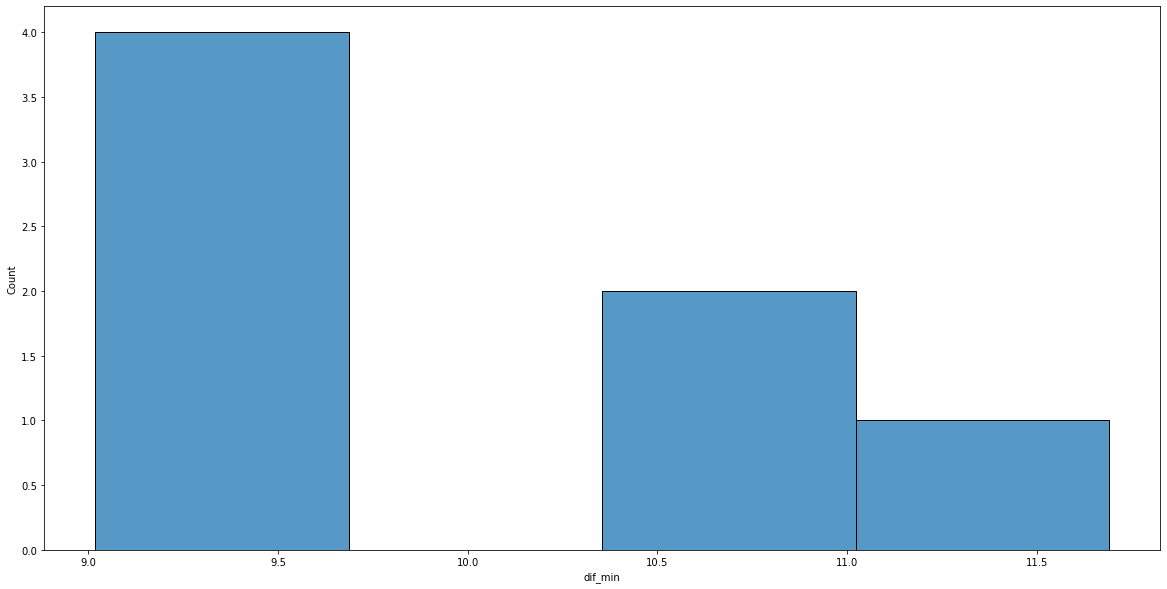

In [95]:
plt.figure(figsize=(20,10))
sns.histplot(bydia['dif_min'],bins=round(1+3.322*m.log10(len(bydia['dif_min']))))

In [96]:
pd.crosstab(index=df['DIANOM'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
DIANOM,,,
Domingo,8218,1578,9796
Jueves,8206,2045,10251
Lunes,8083,2048,10131
Martes,8028,1634,9662
Miercoles,8061,1661,9722
Sabado,6989,1363,8352
Viernes,8007,2285,10292
All,55592,12614,68206


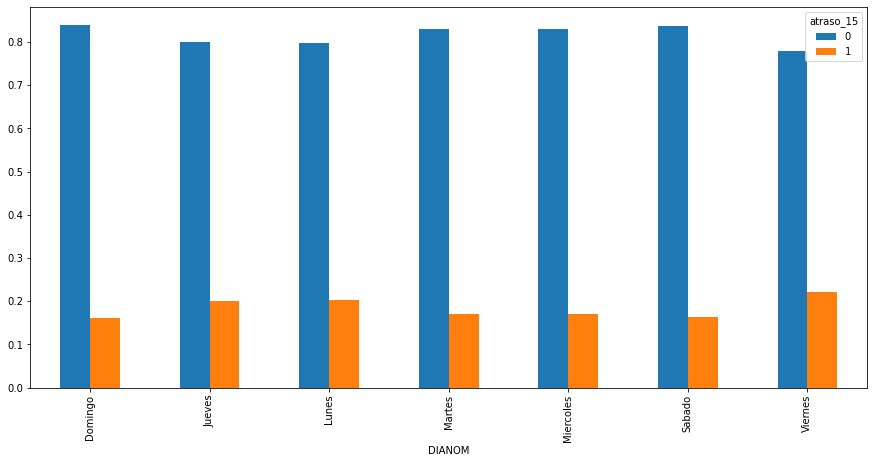

In [97]:
plot = pd.crosstab(index=df['DIANOM'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

In [98]:
bytemporada=df.groupby('temporada_alta').mean()
bytemporada['dif_min'].describe()

count     2.000000
mean     10.248827
std       0.539637
min       9.867246
25%      10.058037
50%      10.248827
75%      10.439618
max      10.630408
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='temporada_alta'>

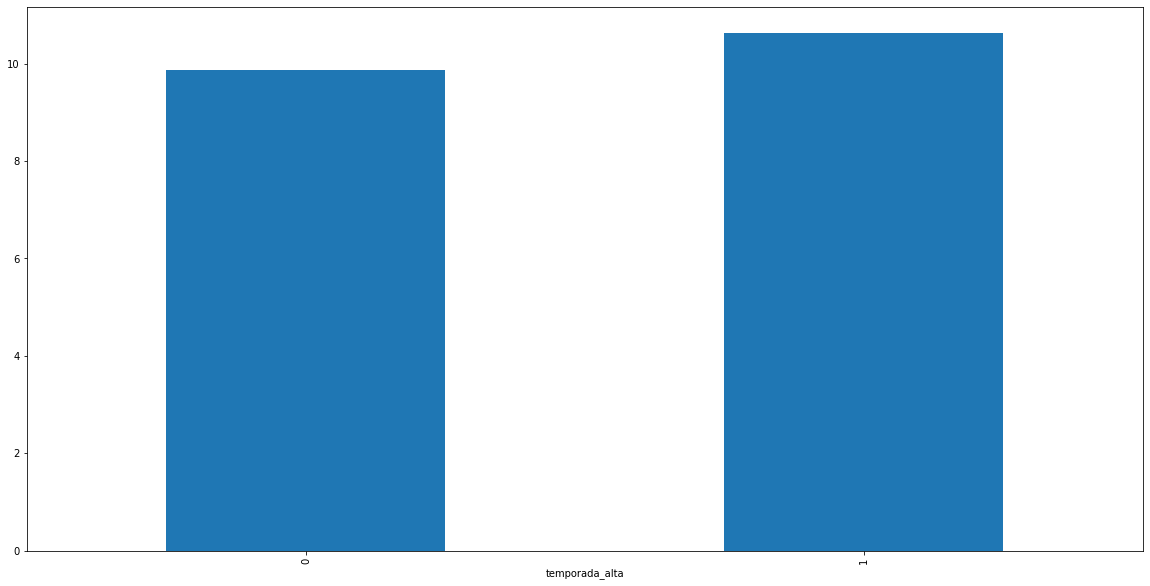

In [99]:
plt.figure(figsize=(20,10))
bytemporada['dif_min'].plot(kind='bar')

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

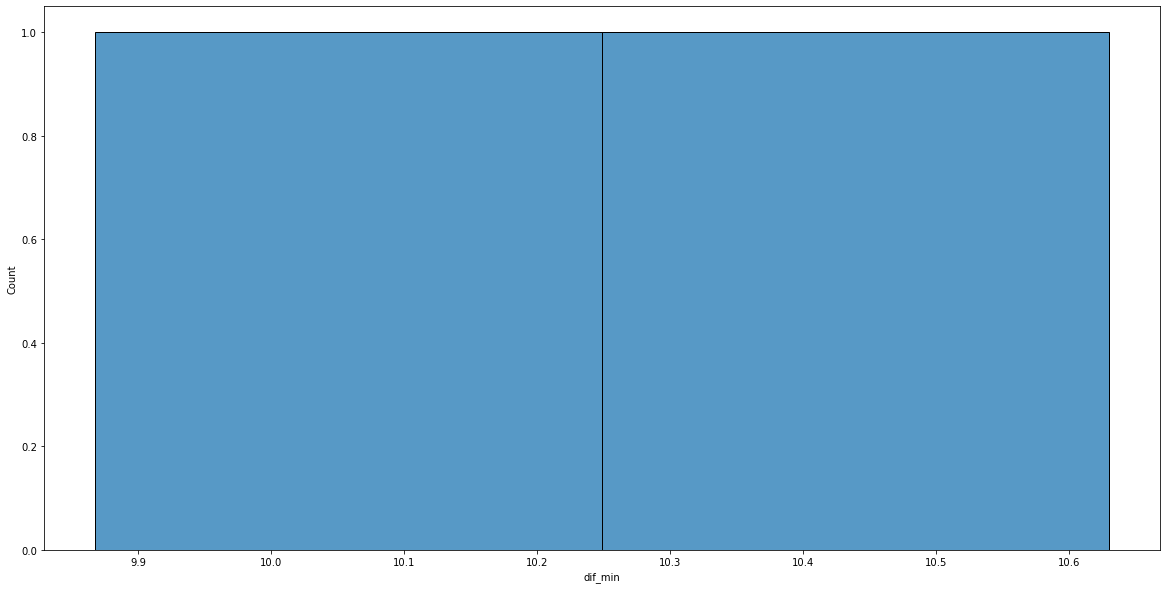

In [100]:
plt.figure(figsize=(20,10))
sns.histplot(bytemporada['dif_min'],bins=round(1+3.322*m.log10(len(bytemporada['dif_min']))))

In [101]:
pd.crosstab(index=df['temporada_alta'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
temporada_alta,,,
0,37741,8254,45995
1,17851,4360,22211
All,55592,12614,68206


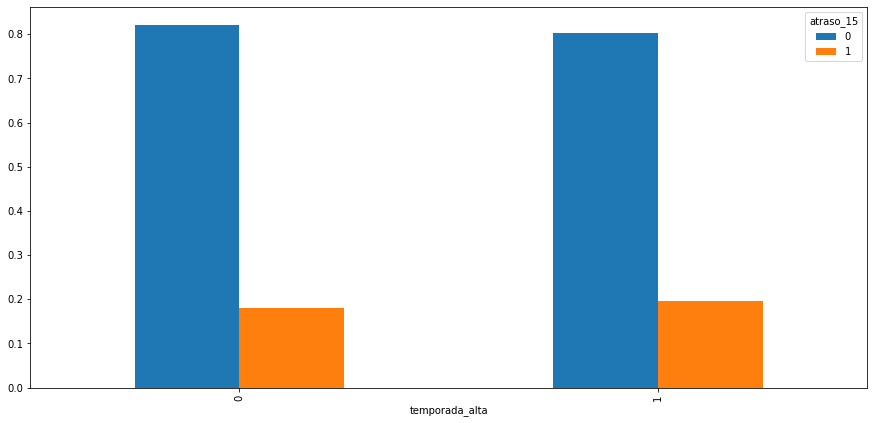

In [102]:
plot = pd.crosstab(index=df['temporada_alta'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

In [103]:
bytipovuelo=df.groupby('TIPOVUELO').mean()
bytipovuelo['dif_min'].describe()

count     2.000000
mean     10.257267
std       2.383655
min       8.571769
25%       9.414518
50%      10.257267
75%      11.100016
max      11.942766
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='TIPOVUELO'>

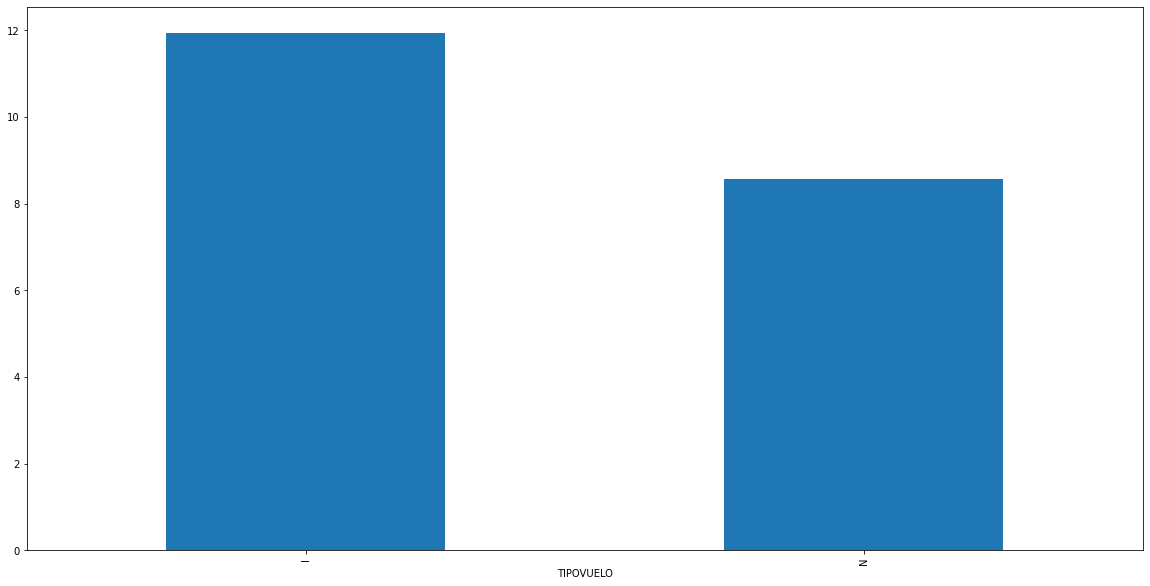

In [104]:
plt.figure(figsize=(20,10))
bytipovuelo['dif_min'].plot(kind='bar')

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

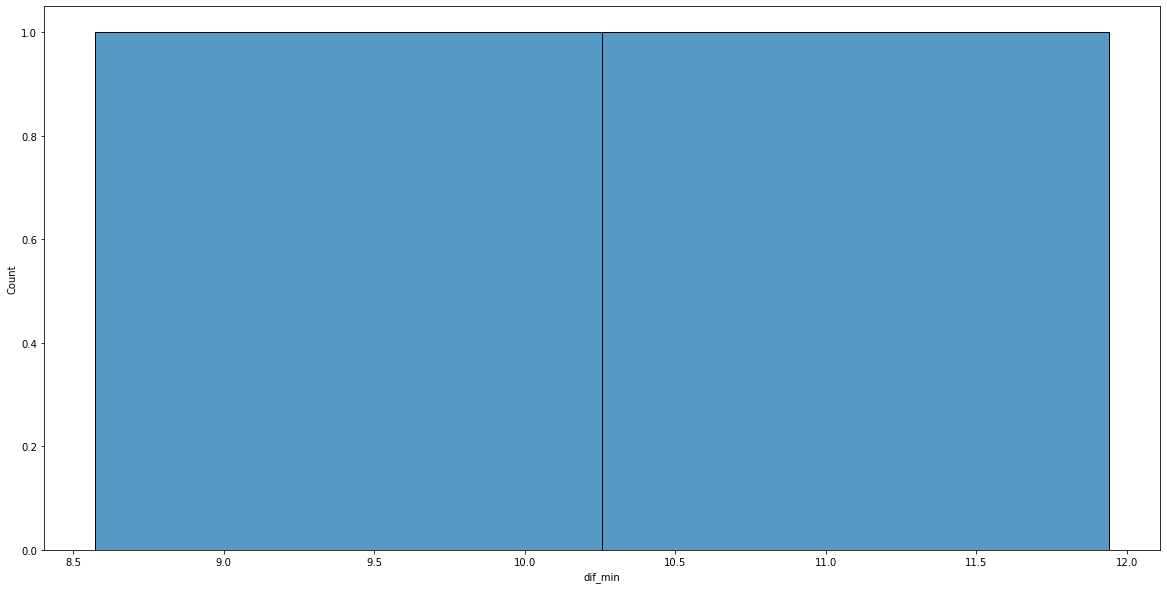

In [105]:
plt.figure(figsize=(20,10))
sns.histplot(bytipovuelo['dif_min'],bins=round(1+3.322*m.log10(len(bytipovuelo['dif_min']))))

In [106]:
pd.crosstab(index=df['TIPOVUELO'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
TIPOVUELO,,,
I,24192,7048,31240
N,31400,5566,36966
All,55592,12614,68206


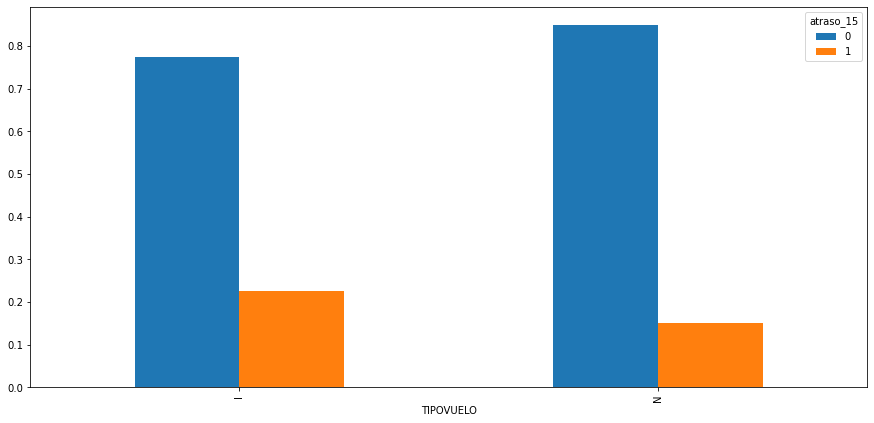

In [107]:
plot = pd.crosstab(index=df['TIPOVUELO'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

### Analisis de Experimentos (ANOVA)

In [108]:
import copy
df_e=copy.copy(df)

In [109]:
df_e.rename(columns={'Des-O':'DesO'},inplace=True)
df_e.rename(columns={'Emp-O':'EmpO'},inplace=True)

In [110]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68205 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   DesO            68206 non-null  object        
 9   EmpO            68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [111]:
formula='dif_min ~ C(DesO) + C(OPERA) + C(MES) + C(DIANOM) + C(temporada_alta) + C(TIPOVUELO)'
modelo = ols(formula = formula, data=df_e).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                dif_min   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     52.80
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:46:30   Log-Likelihood:            -2.9385e+05
No. Observations:               68206   AIC:                         5.879e+05
Df Residuals:                   68108   BIC:                         5.888e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -6.1849      1.669     -3.705      0.000      -9.457      -2.913
C(DesO)[T.EGLL]                      -2.707e+09   5.82e+10     -0.047      0.963   -1.17e+11    1.11e+11
C(DesO)[T.EGYP]                         52.0319     18.063      2.881      0.004      16.628      87.436
C(DesO)[T.KATL]                       5.267e+09    2.2e+10      0.240      0.810   -3.78e+10    4.83e+10
C(DesO)[T.KDFW]                         15.1276      2.159      7.008      0.000      10.897      19.359
C(DesO)[T.KIAD]                       1.858e+09    7.3e+09      0.255      0.799   -1.24e+10    1.62e+10
C(DesO)[T.KIAH]                       1.858e+09    7.3e+09      0.255      0.799   -1.24e+10    1.62e+10
C(DesO)[T.KJFK]                         14.4652      1.808      8.001      0.000      10.922      18.009
C(DesO)[T.KLAX]                         15.4941      2.124      7.294      0.000      11.331      19.658
C(DesO)[T.KMCO]                         14.5838      3.458      4.217      0.000       7.805      21.362
C(DesO)[T.KMIA]                         16.4984      1.716      9.613      0.000      13.135      19.862
C(DesO)[T.LEMD]                         14.0375      1.756      7.994      0.000      10.596      17.479
C(DesO)[T.LFPG]                         80.0680     18.264      4.384      0.000      44.270     115.866
C(DesO)[T.LIRF]                      -4.514e+10   4.52e+11     -0.100      0.921   -9.32e+11    8.42e+11
C(DesO)[T.MDPC]                         16.9790      2.906      5.843      0.000      11.284      22.674
C(DesO)[T.MMMX]                         11.5070      1.830      6.288      0.000       7.920      15.094
C(DesO)[T.MMUN]                         10.1039      2.753      3.670      0.000       4.707      15.500
C(DesO)[T.MPTO]                       2.895e+12   1.16e+13      0.249      0.804   -1.99e+13    2.57e+13
C(DesO)[T.NZAA]                         20.5353      1.822     11.274      0.000      16.965      24.105
C(DesO)[T.SAAR]                         19.7903      2.193      9.025      0.000      15.492      24.088
C(DesO)[T.SABE]                         15.5537      1.602      9.710      0.000      12.414      18.693
C(DesO)[T.SACO]                         16.0769      1.656      9.711      0.000      12.832      19.322
C(DesO)[T.SAEZ]                         13.4141      1.514      8.860      0.000      10.447      16.382
C(DesO)[T.SAME]                         15.5015      1.619      9.575      0.000      12.328      18.675
C(DesO)[T.SANT]                         14.8722      3.311      4.492      0.000       8.383      21.362
C(DesO)[T.SANU]                         13.9693      3.420      4.085      0.000       7.266      20.672
C(DesO)[T.SAWH]                       

In [112]:
anova = anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(DesO),62.0,6.501287e+05,10485.946244,32.387502,0.000000e+00
C(OPERA),22.0,5.577168e+05,25350.764055,78.299840,0.000000e+00
C(MES),11.0,3.871517e+05,35195.612716,108.707210,2.179137e-247
C(DIANOM),6.0,5.973602e+04,9956.002574,30.750687,4.223122e-37
C(temporada_alta),1.0,3.807332e+03,3807.331643,11.759545,6.056784e-04
C(TIPOVUELO),1.0,3.548354e+00,3.548354,0.010960,9.166234e-01
Residual,68108.0,2.205100e+07,323.765209,NaN,NaN


In [113]:
formula='dif_min ~ C(DesO)'
modelo = ols(formula = formula, data=df_e).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                dif_min   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     30.99
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:46:33   Log-Likelihood:            -2.9537e+05
No. Observations:               68206   AIC:                         5.909e+05
Df Residuals:                   68143   BIC:                         5.914e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.1307      1.093     15.666      0.000      14.987      19.274
C(DesO)[T.EGLL]    -8.3161      1.687     -4.929      0.000     -11.623      -5.009
C(DesO)[T.EGYP]    32.8693     18.428      1.784      0.074      -3.249      68.988
C(DesO)[T.KATL]   -13.7872      1.463     -9.423      0.000     -16.655     -10.919
C(DesO)[T.KDFW]   -13.6041      1.464     -9.292      0.000     -16.474     -10.734
C(DesO)[T.KIAD]   -17.1307     18.428     -0.930      0.353     -53.249      18.988
C(DesO)[T.KIAH]   -13.4062      1.486     -9.020      0.000     -16.319     -10.493
C(DesO)[T.KJFK]    -4.5129      1.443     -3.128      0.002      -7.341      -1.685
C(DesO)[T.KLAX]    -3.4791      1.838     -1.893      0.058      -7.082       0.124
C(DesO)[T.KMCO]    -3.4837      3.339     -1.043      0.297     -10.028       3.061
C(DesO)[T.KMIA]    -6.3492      1.236     -5.135      0.000      -8.773      -3.926
C(DesO)[T.LEMD]    -6.5547      1.255     -5.224      0.000      -9.014      -4.095
C(DesO)[T.LFPG]   -12.6656      1.462     -8.661      0.000     -15.532      -9.799
C(DesO)[T.LIRF]    -9.9493      1.582     -6.290      0.000     -13.050      -6.849
C(DesO)[T.MDPC]    -2.8715      2.732     -1.051      0.293      -8.226       2.483
C(DesO)[T.MMMX]   -11.2707      1.296     -8.698      0.000     -13.811      -8.731
C(DesO)[T.MMUN]    -9.0831      2.563     -3.544      0.000     -14.106      -4.060
C(DesO)[T.MPTO]   -13.5340      1.174    -11.527      0.000     -15.835     -11.233
C(DesO)[T.NZAA]     1.5313      1.461      1.048      0.294      -1.331       4.394
C(DesO)[T.SAAR]     2.0384      1.919      1.062      0.288      -1.724       5.800
C(DesO)[T.SABE]    -4.0312      1.142     -3.529      0.000      -6.270      -1.792
C(DesO)[T.SACO]    -2.9685      1.236     -2.403      0.016      -5.390      -0.547
C(DesO)[T.SAEZ]    -4.5007      1.140     -3.947      0.000      -6.736      -2.266
C(DesO)[T.SAME]    -1.1104      1.185     -0.937      0.349      -3.433       1.212
C(DesO)[T.SANT]    -1.8150      3.178     -0.571      0.568      -8.044       4.414
C(DesO)[T.SANU]    -2.7022      3.296     -0.820      0.412      -9.162       3.758
C(DesO)[T.SAWH]     7.3693      7.589      0.971      0.332      -7.505      22.244
C(DesO)[T.SAZN]    -7.5632      3.216     -2.352      0.019     -13.866      -1.260
C(DesO)[T.SAZS]     1.3693     13.053      0.105      0.916     -24.215      26.954
C(DesO)[T.SBCT]   -15.1307     10.677     -1.417      0.156     -36.057       5.796
C(DesO)[T.SBFI]   -14.6307     13.053     -1.121      0.262     -40.215      10.954
C(DesO)[T.SBFL]    -8.1246      1.812     -4.483      0.000     -11.677      -4.572
C(DesO)[T.SBGL]    -2.3851      1.196     -1.993      0.046      -4.730      -0.040
C(DesO)[T.SBGR]    -4.2579      1.136     -3.748      0.000

In [114]:
anova = anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(DesO),62.0,6.501287e+05,10485.946244,30.987543,0.0
Residual,68143.0,2.305907e+07,338.392311,NaN,NaN


In [115]:
formula='dif_min ~ C(OPERA)'
modelo = ols(formula = formula, data=df_e).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                dif_min   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     111.9
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:46:35   Log-Likelihood:            -2.9511e+05
No. Observations:               68206   AIC:                         5.903e+05
Df Residuals:                   68183   BIC:                         5.905e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               12.1668      0.415     29.320      0.000      11.353      12.980
C(OPERA)[T.Aeromexico]                 -10.0870      1.062     -9.496      0.000     -12.169      -8.005
C(OPERA)[T.Air Canada]                  11.6704      0.875     13.333      0.000       9.955      13.386
C(OPERA)[T.Air France]                  -7.9545      1.053     -7.551      0.000     -10.019      -5.890
C(OPERA)[T.Alitalia]                    -4.9853      1.212     -4.115      0.000      -7.360      -2.611
C(OPERA)[T.American Airlines]           -7.9316      0.785    -10.110      0.000      -9.469      -6.394
C(OPERA)[T.Austral]                     -3.3830      2.170     -1.559      0.119      -7.636       0.870
C(OPERA)[T.Avianca]                      1.0277      0.681      1.509      0.131      -0.307       2.362
C(OPERA)[T.British Airways]             -3.3521      1.345     -2.492      0.013      -5.989      -0.716
C(OPERA)[T.Copa Air]                    -8.5700      0.595    -14.412      0.000      -9.736      -7.404
C(OPERA)[T.Delta Air]                   -8.8232      1.053     -8.376      0.000     -10.888      -6.759
C(OPERA)[T.Gol Trans]                    2.7265      0.767      3.554      0.000       1.223       4.230
C(OPERA)[T.Grupo LATAM]                 -2.1496      0.425     -5.061      0.000      -2.982      -1.317
C(OPERA)[T.Iberia]                      -6.1889      1.048     -5.903      0.000      -8.244      -4.134
C(OPERA)[T.JetSmart SPA]                -3.3668      0.692     -4.866      0.000      -4.723      -2.011
C(OPERA)[T.K.L.M.]                      -6.7166      1.229     -5.467      0.000      -9.124      -4.309
C(OPERA)[T.Lacsa]                       -4.5689      1.955     -2.338      0.019      -8.400      -0.738
C(OPERA)[T.Latin American Wings]        13.4420      0.610     22.019      0.000      12.245      14.639
C(OPERA)[T.Oceanair Linhas Aereas]      -2.8944      1.173     -2.468      0.014      -5.193      -0.596
C(OPERA)[T.Plus Ultra Lineas Aereas]    20.1394      2.650      7.600      0.000      14.946      25.333
C(OPERA)[T.Qantas Airways]              14.8538      1.376     10.795      0.000      12.157      17.551
C(OPERA)[T.Sky Airline]                 -3.0104      0.442     -6.805      0.000      -3.877      -2.143
C(OPERA)[T.United Airlines]             -8.4533      1.084     -7.802      0.000     -10.577      -6.330
==============================================================================
Omnibus:                    53938.445   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1154400.057
Skew:                           3.768   Prob(JB):                         0.00
Kurtosis:                      21.692

In [116]:
anova = anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(OPERA),22.0,8.262548e+05,37557.035371,111.906565,0.0
Residual,68183.0,2.288294e+07,335.610653,NaN,NaN


In [117]:
formula='dif_min ~ C(TIPOVUELO)'
modelo = ols(formula = formula, data=df_e).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                dif_min   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     558.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          7.13e-123
Time:                        16:46:36   Log-Likelihood:            -2.9604e+05
No. Observations:               68206   AIC:                         5.921e+05
Df Residuals:                   68204   BIC:                         5.921e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.9428      0.105    113.678      0.000      11.737      12.149
C(TIPOVUELO)[T.N]    -3.3710      0.143    -23.622      0.000      -3.651      -3.091
==============================================================================
Omnibus:                    54714.616   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1184418.858
Skew:                           3.848   Prob(JB):                         0.00
Kurtosis:                      21.909   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
anova = anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(TIPOVUELO),1.0,1.924011e+05,192401.141421,558.006632,7.128469e-123
Residual,68204.0,2.351679e+07,344.800815,NaN,NaN


# 4.
# Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [119]:
df_e

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,DesO,EmpO,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,0.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde


In [120]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [121]:
df_e['DesO']=encoder.fit_transform(df_e.DesO.values)
df_e['EmpO']=encoder.fit_transform(df_e.EmpO.values)
df_e['DIANOM']=encoder.fit_transform(df_e.DIANOM.values)
df_e['TIPOVUELO']=encoder.fit_transform(df_e.TIPOVUELO.values)
df_e['OPERA']=encoder.fit_transform(df_e.OPERA.values)
df_e['periodo_dia']=encoder.fit_transform(df_e.periodo_dia.values)
df_e

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,DesO,EmpO,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,10,2,...,2017,0,0,5,Santiago,Miami,1,3.0,0,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,10,2,...,2017,2,0,5,Santiago,Miami,1,9.0,0,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,10,2,...,2017,3,0,5,Santiago,Miami,1,9.0,0,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,10,2,...,2017,4,0,5,Santiago,Miami,1,3.0,0,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,10,2,...,2017,1,0,5,Santiago,Miami,1,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,57,16,...,2017,6,0,14,Santiago,Lima,1,46.0,1,2
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,57,16,...,2017,2,0,14,Santiago,Lima,1,16.0,1,2
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,57,16,...,2017,4,0,14,Santiago,Lima,1,40.0,1,2
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,57,16,...,2017,6,0,14,Santiago,Lima,1,13.0,0,2


# Modelos de Regresion

In [122]:
X=df_e[['DesO','EmpO','OPERA','TIPOVUELO','temporada_alta','DIANOM','MES','periodo_dia']]
#X=df_e[['DesO','EmpO','temporada_alta','periodo_dia']]
y=df_e['dif_min']

from sklearn import decomposition
pca=decomposition.PCA(n_components=3)
#X=pca.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

### Regresion Lineal

In [123]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_predicciones=lr.predict(X_test)

from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import median_absolute_error, r2_score, mean_poisson_deviance
from sklearn.metrics import mean_absolute_percentage_error

print('Puntuacion R2: ', r2_score(y_test,lr_predicciones))
print('Precision Media: ',lr.score(X_train,y_train))
print('Puntuación de la Varianza Explicada: ', explained_variance_score(y_test,lr_predicciones))
print('Error Maximo: ', max_error(y_test,lr_predicciones))
print('Error Absoluto Medio: ', mean_absolute_error(y_test,lr_predicciones))
print('Error Absoluto Mediano: ', median_absolute_error(y_test,lr_predicciones))
print('Error Cuadrado Medio: ', mean_squared_error(y_test,lr_predicciones))
print('Error Log Cuadrado Medio: ', mean_squared_log_error(y_test,lr_predicciones))
#print('Desviacion Poisson Media: ', mean_poisson_deviance(y_test,lr_predicciones))
print('Error Absoluto Medio Porcentual: ', mean_absolute_percentage_error(y_test,lr_predicciones))

Puntuacion R2:  0.02111292038547896
Precision Media:  0.019680359373671075
Puntuación de la Varianza Explicada:  0.02111302667849002
Error Maximo:  152.16769795685832
Error Absoluto Medio:  10.774403755144531
Error Absoluto Mediano:  7.832304840853444
Error Cuadrado Medio:  335.5079407656855
Error Log Cuadrado Medio:  2.4952068891195296
Error Absoluto Medio Porcentual:  1.4744469811568462e+16


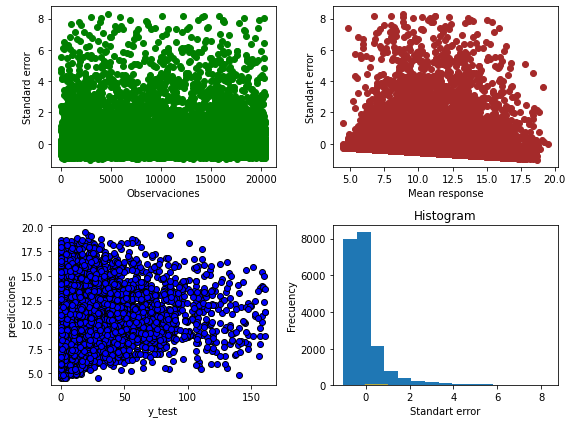

In [124]:
residuos = []
for i in range(len(y_test)):
    residuos.append(np.array(y_test)[i]-lr_predicciones[i])

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(np.array(residuos).reshape(-1, 1))
residuosEstandarizados=scaler.transform(np.array(residuos).reshape(-1, 1))

distr_norm = st.norm(loc=0,scale=1)
x_val = X_test
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(221)
obs = [i for i in range(len(X_test))]
ax.scatter(obs,residuosEstandarizados, color='green')
ax.set_xlabel('Observaciones')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(lr_predicciones,residuosEstandarizados, color='brown')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standart error')

ax = fig.add_subplot(223)
#st.probplot(residuosEstandarizados, plot=ax)
ax.scatter(y_test,lr_predicciones, c='blue', marker='o',edgecolors='black')
ax.set_xlabel('y_test')
ax.set_ylabel('predicciones')

ax = fig.add_subplot(224)
ax.hist(residuosEstandarizados, bins = round(1+3.322*m.log10(len(y_test))))
ax.plot(x_val, distr_norm.pdf(x_val))
ax.set_xlabel('Standart error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()

### Arbol de Decision

In [125]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_predicciones=dt.predict(X_test)

In [126]:
print('Puntuación de la Varianza Explicada: ', explained_variance_score(y_test,dt_predicciones))
print('Error Maximo: ', max_error(y_test,dt_predicciones))
print('Error Absoluto Medio: ', mean_absolute_error(y_test,dt_predicciones))
print('Error Absoluto Mediano: ', median_absolute_error(y_test,dt_predicciones))
print('Error Cuadrado Medio: ', mean_squared_error(y_test,dt_predicciones))
print('Error Log Cuadrado Medio: ', mean_squared_log_error(y_test,dt_predicciones))
print('Puntuacion R2: ', r2_score(y_test,dt_predicciones))
#print('Desviacion Poisson Media: ', mean_poisson_deviance(y_test,dt_predicciones))
print('Error Absoluto Medio Porcentual: ', mean_absolute_percentage_error(y_test,dt_predicciones))

Puntuación de la Varianza Explicada:  -0.28225389613628793
Error Maximo:  161.0
Error Absoluto Medio:  11.565212074737623
Error Absoluto Mediano:  5.866071428571429
Error Cuadrado Medio:  439.49158734671875
Error Log Cuadrado Medio:  2.374878209163003
Puntuacion R2:  -0.2822725908399133
Error Absoluto Medio Porcentual:  1.1517508728673564e+16


### Bosque Aleatorio

In [129]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=300,min_samples_leaf=10,random_state=None,n_jobs=None,oob_score=False)
rf.fit(X_train,y_train)
rf_predicciones=rf.predict(X_test)

In [130]:
print('Puntuación de la Varianza Explicada: ', explained_variance_score(y_test,rf_predicciones))
print('Error Maximo: ', max_error(y_test,rf_predicciones))
print('Error Absoluto Medio: ', mean_absolute_error(y_test,rf_predicciones))
print('Error Absoluto Mediano: ', median_absolute_error(y_test,rf_predicciones))
print('Error Cuadrado Medio: ', mean_squared_error(y_test,rf_predicciones))
print('Error Log Cuadrado Medio: ', mean_squared_log_error(y_test,rf_predicciones))
print('Puntuacion R2: ', r2_score(y_test,rf_predicciones))
#print('Desviacion Poisson Media: ', mean_poisson_deviance(y_test,rf_predicciones))
print('Error Absoluto Medio Porcentual: ', mean_absolute_percentage_error(y_test,rf_predicciones))

Puntuación de la Varianza Explicada:  0.1000571397432618
Error Maximo:  155.7794275952104
Error Absoluto Medio:  10.059801209527636
Error Absoluto Mediano:  6.263839235029886
Error Cuadrado Medio:  308.45065454520864
Error Log Cuadrado Medio:  2.107637564664291
Puntuacion R2:  0.10005599347701666
Error Absoluto Medio Porcentual:  1.1936373737449236e+16


### Red Neuronal

In [131]:
from sklearn.neural_network import MLPRegressor
#mlp=MLPRegressor(hidden_layer_sizes=(10,10,10),max_iter=100,alpha=0.0001,solver='adam',random_state=21,tol=0.000000001)
mlp=MLPRegressor(hidden_layer_sizes=(10,5,10))
mlp.fit(X_train,y_train)
mlp_predicciones=mlp.predict(X_test)

C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [132]:
print('Puntuación de la Varianza Explicada: ', explained_variance_score(y_test,mlp_predicciones))
print('Error Maximo: ', max_error(y_test,mlp_predicciones))
print('Error Absoluto Medio: ', mean_absolute_error(y_test,mlp_predicciones))
print('Error Absoluto Mediano: ', median_absolute_error(y_test,mlp_predicciones))
print('Error Cuadrado Medio: ', mean_squared_error(y_test,mlp_predicciones))
#print('Error Log Cuadrado Medio: ', mean_squared_log_error(y_test,mlp_predicciones))
print('Puntuacion R2: ', r2_score(y_test,mlp_predicciones))
#print('Desviacion Poisson Media: ', mean_poisson_deviance(y_test,mlp_predicciones))
print('Error Absoluto Medio Porcentual: ', mean_absolute_percentage_error(y_test,mlp_predicciones))

Puntuación de la Varianza Explicada:  0.035821562585560796
Error Maximo:  151.7891068363349
Error Absoluto Medio:  10.62064104393124
Error Absoluto Mediano:  7.522576400964753
Error Cuadrado Medio:  330.47264554468495
Puntuacion R2:  0.03580403446949554
Error Absoluto Medio Porcentual:  1.4379985247878498e+16


Dado que los indicadores de evaluacion para los modelos de regresion parecen indicar que ninguno de ellos se ajusta aceptablemente para predecir exactamente los minutos de atraso de un vuelo (R2>=0.8), se decide emplear modelos de clasificacion para determinar mejor si un vuelo se atrasará o no mas de 15 minutos. Y posteriormente, una vez entrenado el modelo, determinar las probabilidades de atraso o no atraso de los vuelo en base al atributo ".predict_proba()".

# Modelos de Clasificacion

In [133]:
X=df_e[['DesO','EmpO','OPERA','TIPOVUELO','temporada_alta','DIANOM','MES','periodo_dia']]
#X=df_e[['DesO','EmpO','temporada_alta','periodo_dia']]
y=df_e['atraso_15']

from sklearn import decomposition
pca=decomposition.PCA(n_components=3)
#X=pca.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 0.19984285,  1.07547412,  1.54956422, ..., -0.48116377,
        -0.74669744, -0.00235199],
       [ 1.53595107,  0.14750281, -0.2656181 , ...,  1.51329572,
         0.38852758, -1.16001769],
       [ 0.86789696, -0.31648284, -0.2656181 , ...,  1.51329572,
         1.52375259, -0.00235199],
       ...,
       [ 0.27407109, -0.31648284, -0.2656181 , ..., -1.47839352,
        -1.5981162 , -1.16001769],
       [-1.58163477, -0.31648284, -0.2656181 , ...,  1.51329572,
        -0.74669744, -0.00235199],
       [-0.98780889, -0.31648284, -0.2656181 , ...,  1.51329572,
        -1.0305037 , -1.16001769]])

### Regresion Logistica

In [134]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)
logr_predicciones=logr.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,logr_predicciones))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16745
           1       0.00      0.00      0.00      3717

    accuracy                           0.82     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.67      0.82      0.74     20462



C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


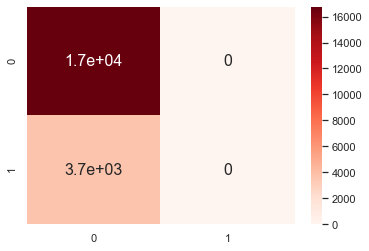

In [135]:
from sklearn.metrics import confusion_matrix
logr_array=confusion_matrix(y_test,logr_predicciones)
df_logr_array=pd.DataFrame(logr_array)
sns.set(font_scale=1)
plt.show(sns.heatmap(df_logr_array,annot=True,annot_kws={'size':16},cmap='Reds'))

In [136]:
#Memoria: Casos positivos correctamente detectados/Casos positivos reales
#Precision: Casos positivos correctamente detectados/Casos positivos totales asignados por el modelo
#Puntuacion F1: (2*Memoria*Precision)/((Memoria+Precision)
from sklearn.metrics import recall_score, precision_score, f1_score
print('Memoria logr: ', recall_score(y_test,logr_predicciones))
print('Precision logr: ', precision_score(y_test,logr_predicciones))
print('Puntuacion F1 logr: ', f1_score(y_test,logr_predicciones))

Memoria logr:  0.0
Precision logr:  0.0
Puntuacion F1 logr:  0.0


C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


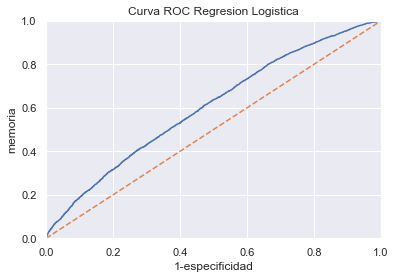

In [137]:
#Curva ROC: Es un grafico que muestra la especificidad vs la memoria. Para su construccion se utilizan las probabilidades predecidas por nuestro modelo.
#Especificidad: Casos negativos correctamente detectados/Casos negativos reales.
from sklearn.metrics import roc_curve, roc_auc_score

logr_pbb_predicciones=logr.predict_proba(X_test)

memlogr, unomenosespeclogr, umbrallogr = roc_curve(y_test,logr_pbb_predicciones[:,1])
plt.title('Curva ROC Regresion Logistica')
plt.plot(memlogr, unomenosespeclogr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('1-especificidad')
plt.ylabel('memoria')
plt.show()

In [138]:
print('Area por debajo de la curva ROC: ',roc_auc_score(y_test,logr_pbb_predicciones[:,1]))

Area por debajo de la curva ROC:  0.6038983685475682


### Arbol de Decision

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predicciones=dtc.predict(X_test)

print(classification_report(y_test,dtc_predicciones))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     16745
           1       0.36      0.19      0.25      3717

    accuracy                           0.79     20462
   macro avg       0.60      0.56      0.56     20462
weighted avg       0.75      0.79      0.76     20462



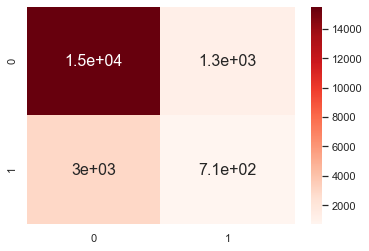

In [140]:
dtc_array=confusion_matrix(y_test,dtc_predicciones)
df_dtc_array=pd.DataFrame(dtc_array)
sns.set(font_scale=1)
plt.show(sns.heatmap(df_dtc_array,annot=True,annot_kws={'size':16},cmap='Reds'))

In [141]:
print('Memoria dtc: ', recall_score(y_test,dtc_predicciones))
print('Precision dtc: ', precision_score(y_test,dtc_predicciones))
print('Puntuacion F1 dtc: ', f1_score(y_test,dtc_predicciones))

Memoria dtc:  0.19101425881086898
Precision dtc:  0.3611393692777213
Puntuacion F1 dtc:  0.24986802745029035


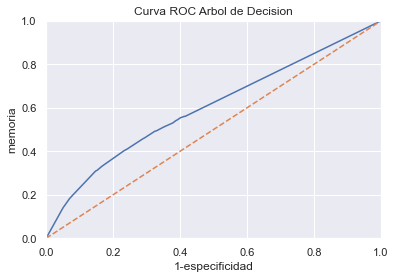

In [142]:
dtc_pbb_predicciones=dtc.predict_proba(X_test)

memdtc, unomenosespecdtc, umbraldtc = roc_curve(y_test,dtc_pbb_predicciones[:,1])
plt.title('Curva ROC Arbol de Decision')
plt.plot(memdtc, unomenosespecdtc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('1-especificidad')
plt.ylabel('memoria')
plt.show()

In [143]:
print('Area por debajo de la curva ROC: ',roc_auc_score(y_test,dtc_pbb_predicciones[:,1]))

Area por debajo de la curva ROC:  0.6011475604609907


### Bosque Aleatorio

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predicciones=rfc.predict(X_test)

print(classification_report(y_test,rfc_predicciones))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     16745
           1       0.37      0.23      0.28      3717

    accuracy                           0.79     20462
   macro avg       0.60      0.57      0.58     20462
weighted avg       0.76      0.79      0.77     20462



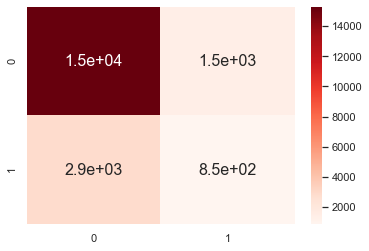

In [145]:
rfc_array=confusion_matrix(y_test,rfc_predicciones)
df_rfc_array=pd.DataFrame(rfc_array)
sns.set(font_scale=1)
plt.show(sns.heatmap(df_rfc_array,annot=True,annot_kws={'size':16},cmap='Reds'))

In [146]:
print('Memoria dtc: ', recall_score(y_test,rfc_predicciones))
print('Precision dtc: ', precision_score(y_test,rfc_predicciones))
print('Puntuacion F1 dtc: ', f1_score(y_test,rfc_predicciones))

Memoria dtc:  0.22867904223836427
Precision dtc:  0.3665373005605865
Puntuacion F1 dtc:  0.28164347249834326


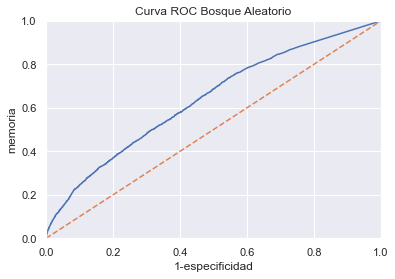

In [147]:
rfc_pbb_predicciones=rfc.predict_proba(X_test)

memrfc, unomenosespecrfc, umbralrfc = roc_curve(y_test,rfc_pbb_predicciones[:,1])
plt.title('Curva ROC Bosque Aleatorio')
plt.plot(memrfc, unomenosespecrfc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('1-especificidad')
plt.ylabel('memoria')
plt.show()

In [148]:
print('Area por debajo de la curva ROC: ',roc_auc_score(y_test,rfc_pbb_predicciones[:,1]))

Area por debajo de la curva ROC:  0.6378495084402742


### Red Neuronal

In [149]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier()
mlpc.fit(X_train,y_train)
mlpc_predicciones=mlpc.predict(X_test)

print(classification_report(y_test,mlpc_predicciones))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     16745
           1       0.61      0.07      0.12      3717

    accuracy                           0.82     20462
   macro avg       0.72      0.53      0.51     20462
weighted avg       0.79      0.82      0.76     20462



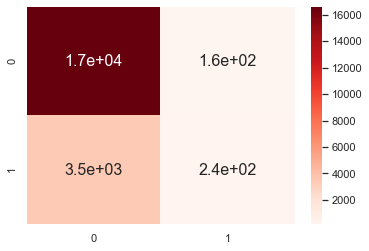

In [150]:
mlpc_array=confusion_matrix(y_test,mlpc_predicciones)
df_mlpc_array=pd.DataFrame(mlpc_array)
sns.set(font_scale=1)
plt.show(sns.heatmap(df_mlpc_array,annot=True,annot_kws={'size':16},cmap='Reds'))

In [151]:
print('Memoria dtc: ', recall_score(y_test,mlpc_predicciones))
print('Precision dtc: ', precision_score(y_test,mlpc_predicciones))
print('Puntuacion F1 dtc: ', f1_score(y_test,mlpc_predicciones))

Memoria dtc:  0.06564433683077751
Precision dtc:  0.6084788029925187
Puntuacion F1 dtc:  0.11850412821758136


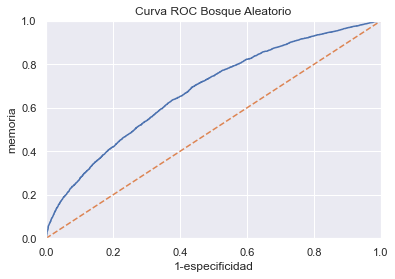

In [152]:
mlpc_pbb_predicciones=mlpc.predict_proba(X_test)

memmlpc, unomenosespecmlpc, umbralmlpc = roc_curve(y_test,mlpc_pbb_predicciones[:,1])
plt.title('Curva ROC Bosque Aleatorio')
plt.plot(memmlpc, unomenosespecmlpc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('1-especificidad')
plt.ylabel('memoria')
plt.show()

In [153]:
print('Area por debajo de la curva ROC: ',roc_auc_score(y_test,mlpc_pbb_predicciones[:,1]))

Area por debajo de la curva ROC:  0.6792977204073863
